<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Home Credit Default Risk</h1>
</div>

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Setup Environment</h2>
</div>

The goal of this section is to:
- Import all the packages
- Set the options for data visualizations

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec

# Track time
import time
import datetime

# Machine Learning
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler
from lifelines.utils import concordance_index
from scipy.stats import chi2_contingency, f_oneway

import os
import gc
import warnings
from tqdm import tqdm


# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)
%matplotlib inline
warnings.filterwarnings("ignore")

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load data</h2>
</div>

The goal of this section is to:
- Load the datasets 
- Get overview of the data

In [2]:
# Get all the files in Data directory
print(os.listdir("Data"))

['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', '.ipynb_checkpoints', 'previous_application.csv', 'bureau_balance.csv']


In [3]:
%%time
# load dataset
application_df = pd.read_csv('Data/application_train.csv')
pos_cash_balance_df = pd.read_csv('Data/POS_CASH_balance.csv')
previous_application_df = pd.read_csv('Data/previous_application.csv')
credit_card_balance_df = pd.read_csv('Data/credit_card_balance.csv')
installments_payment_df = pd.read_csv('Data/installments_payments.csv')
bureau_df = pd.read_csv('Data/bureau.csv')
bureau_balance_df = pd.read_csv('Data/bureau_balance.csv')

CPU times: user 30.9 s, sys: 5.48 s, total: 36.4 s
Wall time: 37 s


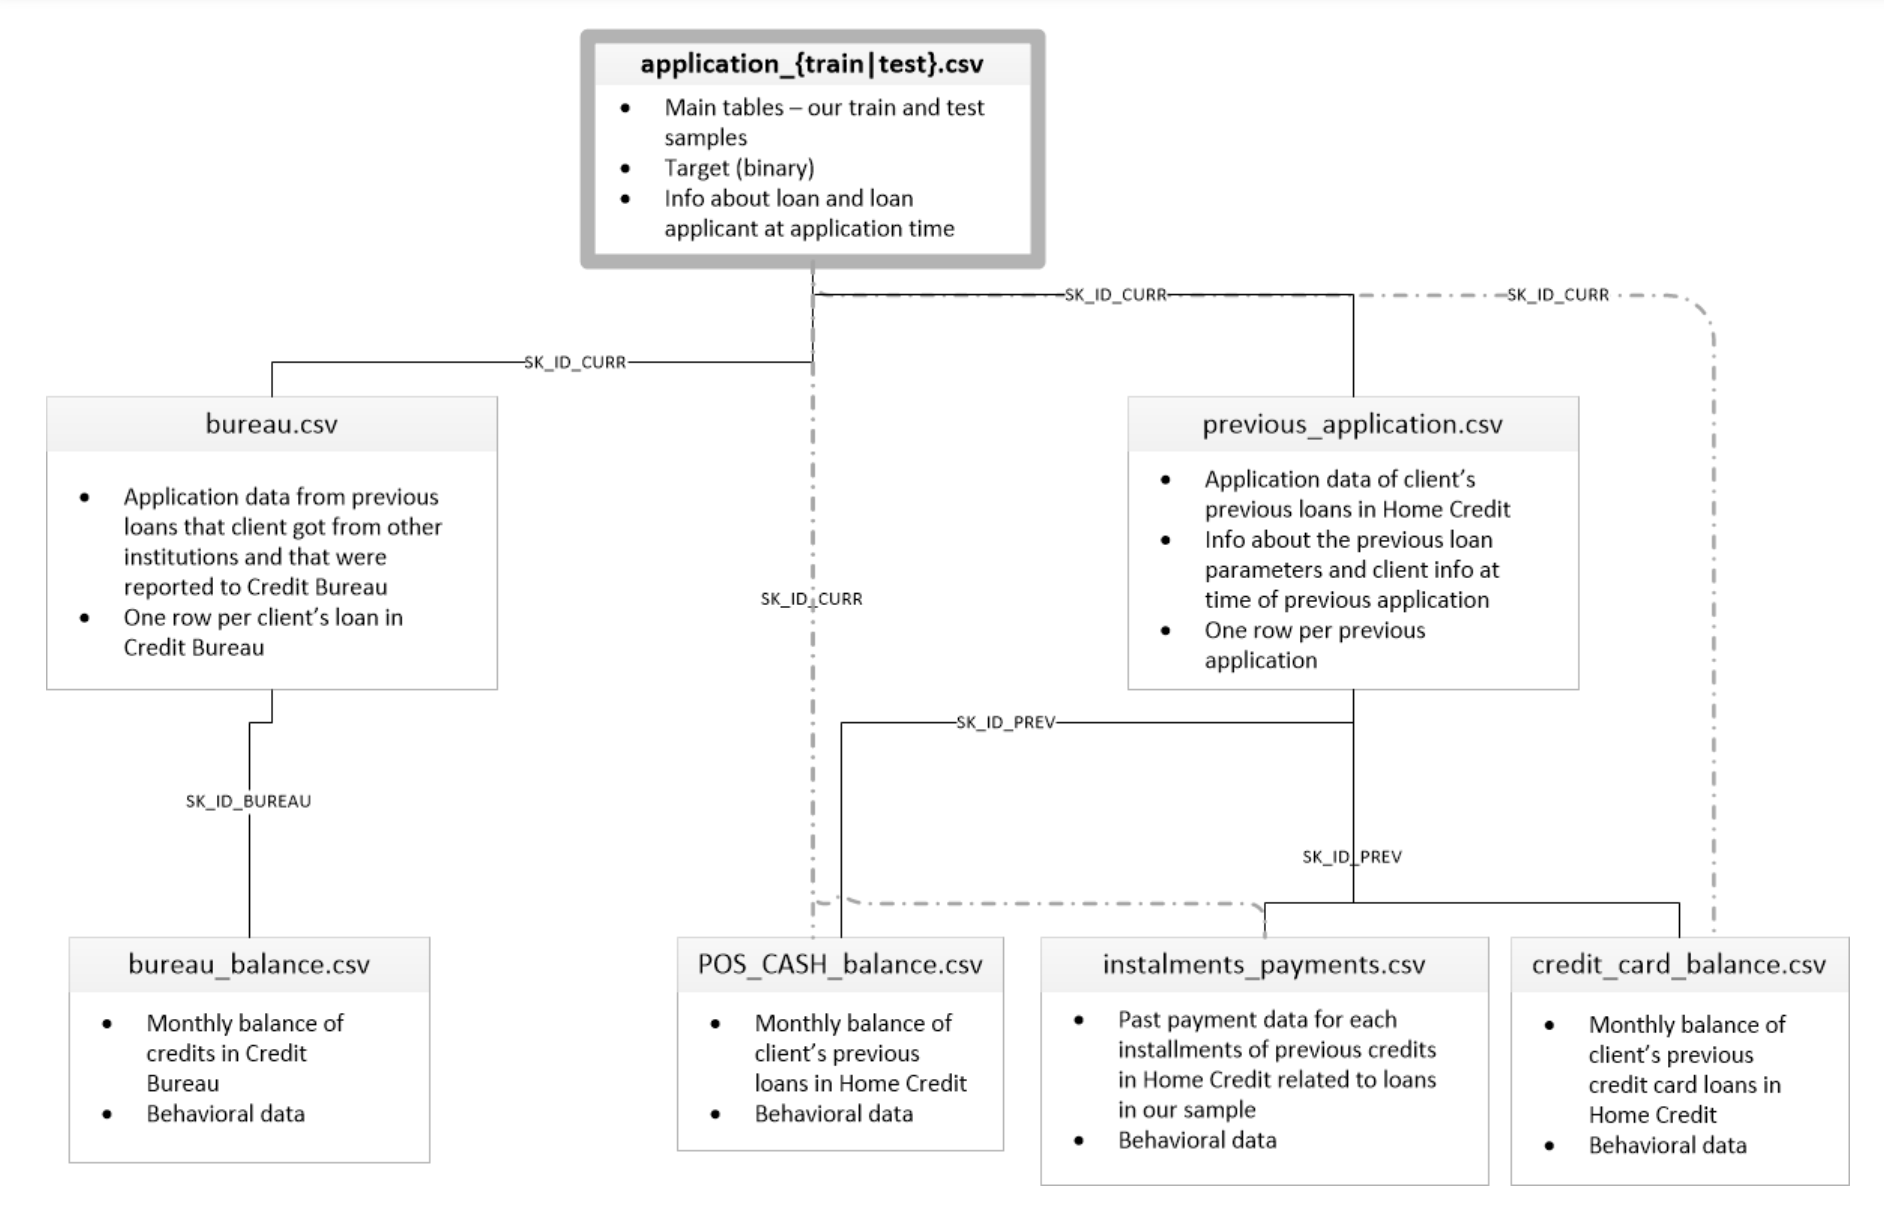

### Application Dataframe

In [4]:
# Dimensions
print('Dimensions of application_train data', application_df.shape)
application_df.head()

Dimensions of application_train data (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

#### Data Description

This is the main table having the target variable `TARGET`.
It is the static data for all applications. One row represents one loan in our data sample

### POS_CASH_balance Dataframe

In [5]:
# Dimensions
print('Dimensions of POS_CASH_balance data', pos_cash_balance_df.shape)
pos_cash_balance_df.head()

Dimensions of POS_CASH_balance data (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     1803195      182943             -31            48.0                   45.0               Active       0           0
1     1715348      367990             -33            36.0                   35.0               Active       0           0
2     1784872      397406             -32            12.0                    9.0               Active       0           0
3     1903291      269225             -35            48.0                   42.0               Active       0           0
4     2341044      334279             -35            36.0                   35.0               Active       0           0

#### Data Description

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

### bureau_balance Dataframe

In [6]:
# Dimensions
print('Dimensions of bureau_balance data', bureau_balance_df.shape)
bureau_balance_df.head()

Dimensions of bureau_balance data (27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

#### Data Description

- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

### bureau Dataframe

In [7]:
# Dimensions
print('Dimensions of bureau data', bureau_df.shape)
bureau_df.head()

Dimensions of bureau data (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY
0      215354       5714462        Closed      currency 1         -497                   0               -153.0             -153.0                     NaN                   0         91323.0                  0.0                   NaN                     0.0  Consumer credit                -131          NaN
1      215354       5714463        Active      currency 1         -208                   0               1075.0                NaN                     NaN                   0        225000.0             171342.0                   NaN                     0.0      Credit card                 -20          NaN
2      215354       5714464        Active      currency 1         -203                   0                528.0                NaN                     NaN                   0        464323.5                  NaN                   NaN                     0.0  Consumer credit                 -16          NaN
3      215354       5714465        Active      currency 1         -203                   0                  NaN                NaN                     NaN                   0         90000.0                  NaN                   NaN                     0.0      Credit card                 -16          NaN
4      215354       5714466        Active      currency 1         -629                   0               1197.0                NaN                 77674.5                   0       2700000.0                  NaN                   NaN                     0.0  Consumer credit                 -21          NaN

#### Data Description

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

### previous_application Dataframe

In [8]:
# Dimensions
print('Dimensions of previous application data', previous_application_df.shape)
previous_application_df.head()

Dimensions of previous application data (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

#### Data Description

- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

### installments_payment Dataframe

In [9]:
# Dimensions
print('Dimensions of Installments Payment data', installments_payment_df.shape)
installments_payment_df.head()

Dimensions of Installments Payment data (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT
0     1054186      161674                     1.0                      6          -1180.0             -1187.0        6948.360     6948.360
1     1330831      151639                     0.0                     34          -2156.0             -2156.0        1716.525     1716.525
2     2085231      193053                     2.0                      1            -63.0               -63.0       25425.000    25425.000
3     2452527      199697                     1.0                      3          -2418.0             -2426.0       24350.130    24350.130
4     2714724      167756                     1.0                      2          -1383.0             -1366.0        2165.040     2160.585

#### Data Description

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

### credit_card_balance Dataframe

In [10]:
# Dimensions
print('Dimensions of Credit Card Balance data', credit_card_balance_df.shape)
credit_card_balance_df.head()

Dimensions of Credit Card Balance data (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     2562384      378907              -6       56.970                   135000                       0.0                 877.5                         0.0                     877.5                 1700.325               1800.0                     1800.0                     0.000          0.000                 0.000                       0.0                     1                         0.0                       1.0                       35.0               Active       0           0
1     2582071      363914              -1    63975.555                    45000                    2250.0                2250.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 60175.080      64875.555             64875.555                       1.0                     1                         0.0                       0.0                       69.0               Active       0           0
2     1740877      371185              -7    31815.225                   450000                       0.0                   0.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 26926.425      31460.085             31460.085                       0.0                     0                         0.0                       0.0                       30.0               Active       0           0
3     1389973      337855              -4   236572.110                   225000                    2250.0                2250.0                         0.0                       0.0                11795.760              11925.0                    11925.0                224949.285     233048.970            233048.970                       1.0                     1                         0.0                       0.0                       10.0               Active       0           0
4     1891521      126868              -1   453919.455                   450000                       0.0               11547.0                         0.0                   11547.0                22924.890              27000.0                    27000.0                443044.395     453919.455            453919.455                       0.0                     1                         0.0                       1.0                      101.0               Active       0           0

#### Data Description

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

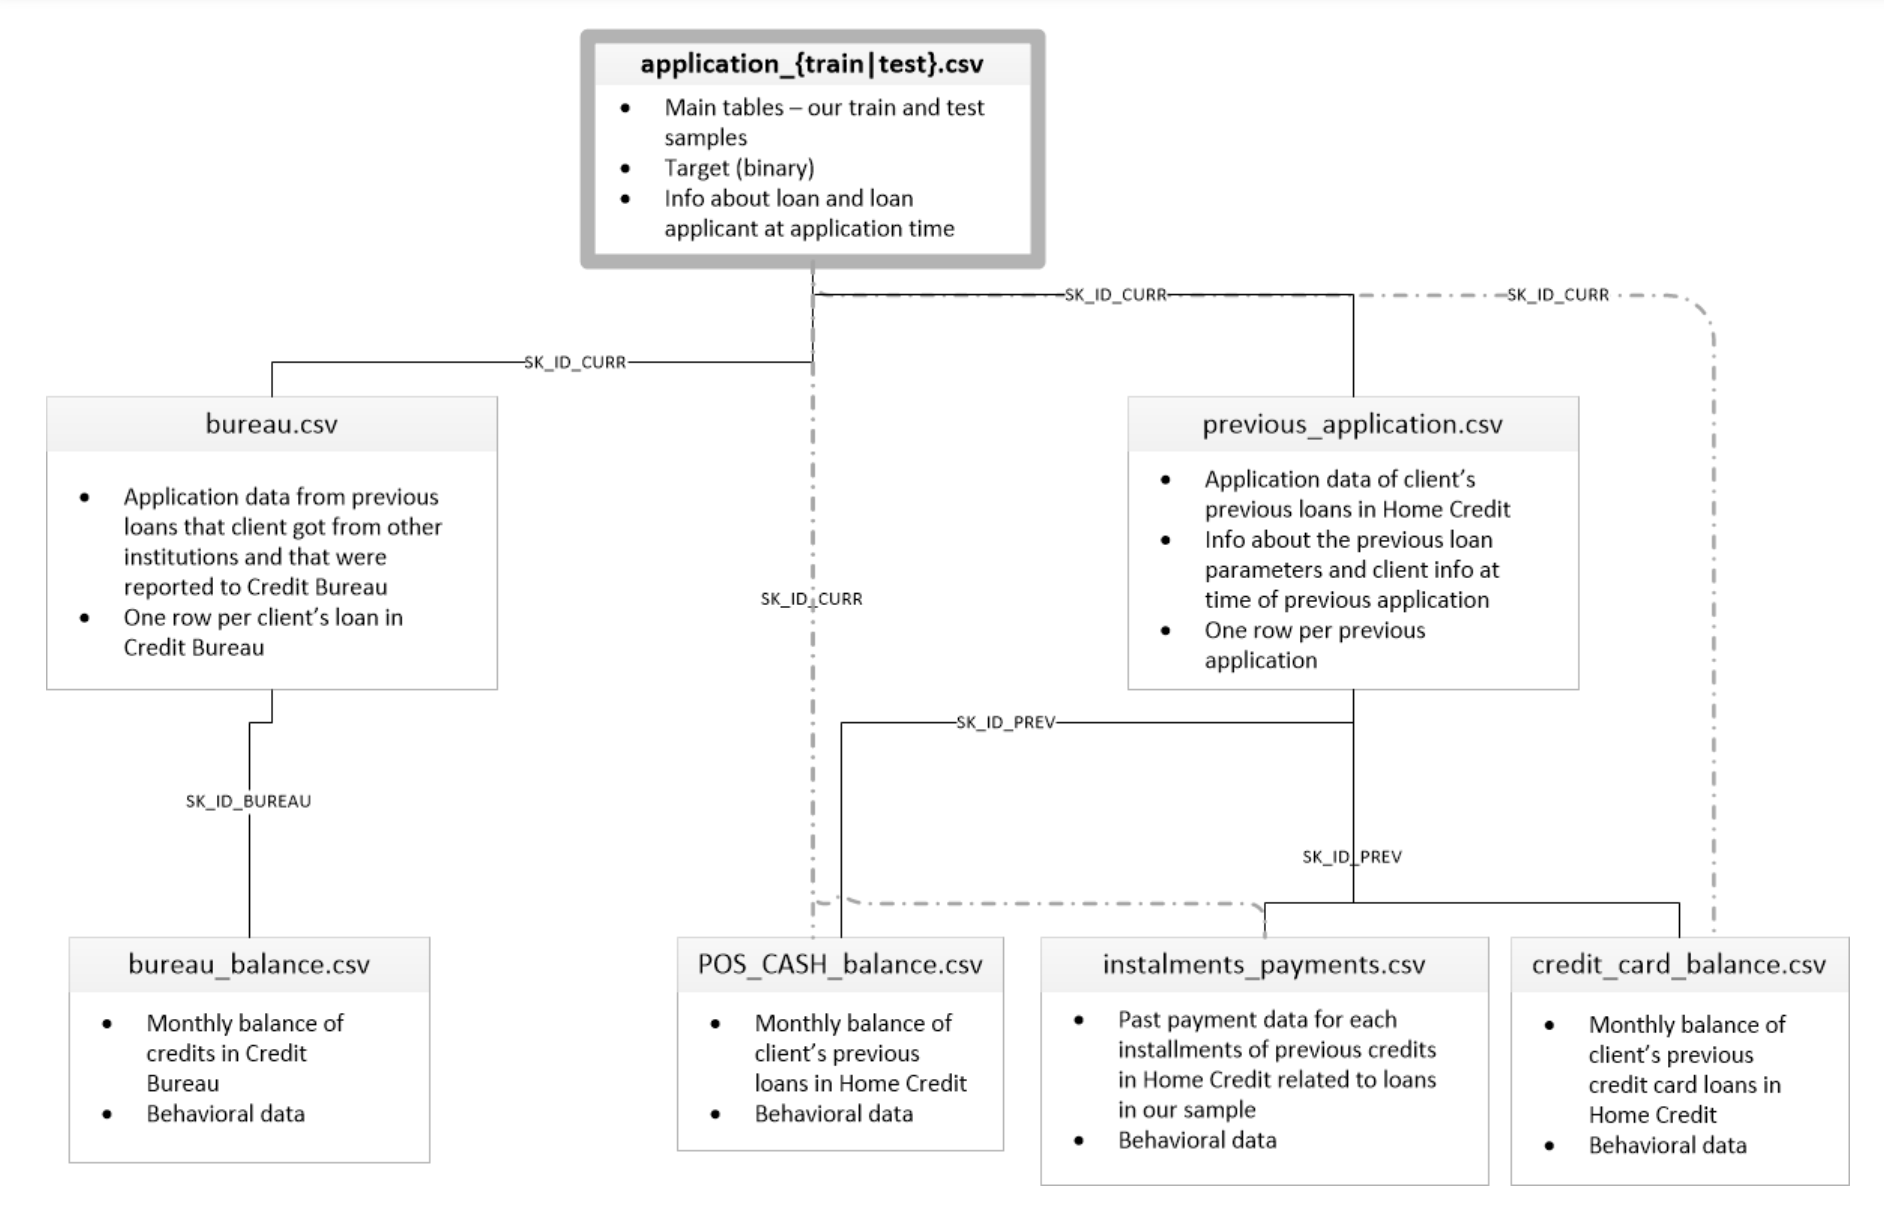

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Optimize Memory Used by Data</h2>
</div>

Certain features occupy more memory than what is needed to store them. Reducing the memory usage by changing data type will speed up the computations.

Let's create a function for that:

- int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255
- bool : consumes 1 byte, true or false
- float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535
- float32 / int32 / uint32 : consumes 4 bytes of memory, range between -2147483648 and 2147483647
- float64 / int64 / uint64: consumes 8 bytes of memory

In [11]:
# Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

Use the defined function to reduce the memory usage

In [12]:
# Reduce the memory size of the dataframe
application_df = reduce_mem_usage(application_df)
pos_cash_balance_df = reduce_mem_usage(pos_cash_balance_df)
previous_application_df = reduce_mem_usage(previous_application_df)
credit_card_balance_df = reduce_mem_usage(credit_card_balance_df)
installments_payment_df = reduce_mem_usage(installments_payment_df)
bureau_df = reduce_mem_usage(bureau_df)
bureau_balance_df = reduce_mem_usage(bureau_balance_df)

Mem. usage decreased to 342.84 Mb (36.1% reduction)
Mem. usage decreased to 765.27 Mb (32.7% reduction)
Mem. usage decreased to 1738.16 Mb (8.5% reduction)
Mem. usage decreased to 491.13 Mb (43.9% reduction)
Mem. usage decreased to 311.40 Mb (62.5% reduction)
Mem. usage decreased to 402.44 Mb (21.4% reduction)
Mem. usage decreased to 1640.22 Mb (14.9% reduction)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Understand the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get the dimensions of data
- Get the summary of data
- Get various statistics of data

### Application Dataframe

In [13]:
# Dimensions
print('Dimensions of application_train data', application_df.shape)
application_df.head()

Dimensions of application_train data (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018799       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083008      0.262939      0.139404        0.024704          0.036896                     0.972168         0.619141        0.014297       0.000000       0.068970       0.083313       0.125000      0.036896              0.020203        0.018997                 0.000000           0.000000         0.025208           0.038300                      0.972168          0.634277         0.014397        0.000000        0.068970        0.083313        0.125000       0.037689               0.022003         0.019806                       0.0                 0.0         0.024994           0.036896                      0.972168          0.624512         0.014397        0.000000        0.068970        0.083313        0.125000       0.037506               0.020493         0.019302                  0.000000            0.000000   reg oper account  block of flats        0.014900       Stone, brick       

The application data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [14]:
# Summary
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000           307511.0    307511.000000     104582.0  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000         307509.0         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000   151450.000000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000                  306490.0             306490.000000                  306490.0             306490.000000                307510.0    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.000000   

Mean of few of the columns in NA that means these columns have missing values.

Features are not scalled as the min max values of the features are varying a lot.

DAYS_EMPLOYED is having max value as 365243, this seems like an anomoly. We will check it later on in EDA


Let's look at few more statistics

In [15]:
def get_stats(df):
    
    # Stats of dataset
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    return stats_df

In [16]:
stats_df = get_stats(application_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
76                COMMONAREA_MEDI           2849                     69.872297                                     69.872297  float16
48                 COMMONAREA_AVG           2841                     69.872297                                     69.872297  float16
62                COMMONAREA_MODE           2808                     69.872297                                     69.872297  float16
70       NONLIVINGAPARTMENTS_MODE            167                     69.432963                                     69.432963  float16
56        NONLIVINGAPARTMENTS_AVG            386                     69.432963                                     69.432963  float16
84       NONLIVINGAPARTMENTS_MEDI            214                     69.432963                                     69.432963  float16
86             FONDKAPREMONT_MODE              4                     68.386172                                     68.386172   object
68          LIVINGAPARTMENTS_MODE            736                     68.354953                                     68.354953  float16
54           LIVINGAPARTMENTS_AVG           1840                     68.354953                                     68.354953  float16
82          LIVINGAPARTMENTS_MEDI           1097                     68.354953                                     68.354953  float16
52                  FLOORSMIN_AVG            304                     67.848630                                     67.848630  float16
66                 FLOORSMIN_MODE             25                     67.848630                                     67.848630  float16
80                 FLOORSMIN_MEDI             47                     67.848630                                     67.848630  float16
75               YEARS_BUILD_MEDI            151                     66.497784                                     66.497784  float16
61               YEARS_BUILD_MODE            154                     66.497784                                     66.497784  float16
47                YEARS_BUILD_AVG            149                     66.497784                                     66.497784  float16
21                    OWN_CAR_AGE             62                     65.990810                                     65.990810  float16
81                  LANDAREA_MEDI           3041                     59.376738                                     59.376738  float16
67                  LANDAREA_MODE           3031                     59.376738                                     59.376738  float16
53                   LANDAREA_AVG           3011                     59.376738                                     59.376738  float16
73              BASEMENTAREA_MEDI           3121                     58.515956                                     58.515956  float16
45               BASEMENTAREA_AVG           3127                     58.515956                                     58.515956  float16
59              BASEMENTAREA_MODE           3148                     58.515956                                     58.515956  float16
41                   EXT_SOURCE_1           4430                     56.381073                                     56.381073  float16
71             NONLIVINGAREA_MODE           2924                     55.179164                                     55.179164  float16
57              NONLIVINGAREA_AVG           2885                     55.179164                                     55.179164  float16
85             NONLIVINGAREA_MEDI           2923                     55.179164                                     55.179164  float16
77                 ELEVATORS_MEDI             46                     53.295980                                     53.295980  float16
49                  ELEVATORS_AVG            257                     53.295980                                     53.295980  float16
63    

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- Lot of columns have missing values. Few columns like COMMONAREA_MEDI,COMMONAREA_AVG, NONLIVINGAPARTMENTS_MODE etc have more than 69% missing values
- FLAG_DOCUMENT_2,FLAG_DOCUMENT_5 and few more columns have 95% + values belonging to same category
- The target variable doesn't have any missing values, which is good
- The target variable contains 2 categories, as expected
- Target class is imbalanced. So no need to drop the columns where one category contains the majority of rows 
- Columns are not scalled as the min max values of the columns are varying a lot
- SK_ID_CURR is the unique key of data

### POS_CASH_balance Dataframe

In [17]:
# Dimensions
print('Dimensions of POS_CASH_balance data', pos_cash_balance_df.shape)
pos_cash_balance_df.head()

Dimensions of POS_CASH_balance data (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     1803195      182943             -31            48.0                   45.0               Active       0           0
1     1715348      367990             -33            36.0                   35.0               Active       0           0
2     1784872      397406             -32            12.0                    9.0               Active       0           0
3     1903291      269225             -35            48.0                   42.0               Active       0           0
4     2341044      334279             -35            36.0                   35.0               Active       0           0

In [18]:
# Summary
pos_cash_balance_df.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF
count  1.000136e+07  1.000136e+07    1.000136e+07       9975287.0              9975271.0  1.000136e+07  1.000136e+07
mean   1.903217e+06  2.784039e+05   -3.501259e+01             NaN                    NaN  1.160693e+01  6.544684e-01
std    5.358465e+05  1.027637e+05    2.606657e+01             0.0                    0.0  1.327140e+02  3.276249e+01
min    1.000001e+06  1.000010e+05   -9.600000e+01             1.0                    0.0  0.000000e+00  0.000000e+00
25%    1.434405e+06  1.895500e+05   -5.400000e+01            10.0                    3.0  0.000000e+00  0.000000e+00
50%    1.896565e+06  2.786540e+05   -2.800000e+01            12.0                    7.0  0.000000e+00  0.000000e+00
75%    2.368963e+06  3.674290e+05   -1.300000e+01            24.0                   14.0  0.000000e+00  0.000000e+00
max    2.843499e+06  4.562550e+05   -1.000000e+00            92.0                   85.0  4.231000e+03  3.595000e+03

Mean of few of the columns in NA that means these columns have missing values.

Let's look at few more statistics

In [19]:
stats_df = get_stats(pos_cash_balance_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
4  CNT_INSTALMENT_FUTURE             79                      0.260835                                     11.857990  float16
3         CNT_INSTALMENT             73                      0.260675                                     24.965060  float16
0             SK_ID_PREV         936325                      0.000000                                      0.000960    int32
1             SK_ID_CURR         337252                      0.000000                                      0.002950    int32
2         MONTHS_BALANCE             96                      0.000000                                      2.164116     int8
5   NAME_CONTRACT_STATUS              9                      0.000000                                     91.498764   object
6                 SK_DPD           3400                      0.000000                                     97.048131    int16
7             SK_DPD_DEF           2307                      0.000000                                     98.860465    int16

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_CURR columnhas 337252 unique values, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_CURR in order to merge it with the master dataframe

### bureau_balance Dataframe

In [20]:
# Dimensions
print('Dimensions of bureau_balance data', bureau_balance_df.shape)
bureau_balance_df.head()

Dimensions of bureau_balance data (27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Let's look at few more statistics

In [21]:
stats_df = get_stats(bureau_balance_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0    SK_ID_BUREAU         817395                           0.0                                      0.000355   int32
1  MONTHS_BALANCE             97                           0.0                                      2.280596    int8
2          STATUS              8                           0.0                                     49.989123  object

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_BUREAU column has 817395 unique values while the data has 27299925 rows, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_BUREAU in order to merge it with the master dataframe

### bureau Dataframe

In [22]:
# Dimensions
print('Dimensions of bureau data', bureau_df.shape)
bureau_df.head()

Dimensions of bureau data (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY
0      215354       5714462        Closed      currency 1         -497                   0               -153.0             -153.0                     NaN                   0         91323.0                  0.0                   NaN                     0.0  Consumer credit                -131          NaN
1      215354       5714463        Active      currency 1         -208                   0               1075.0                NaN                     NaN                   0        225000.0             171342.0                   NaN                     0.0      Credit card                 -20          NaN
2      215354       5714464        Active      currency 1         -203                   0                528.0                NaN                     NaN                   0        464323.5                  NaN                   NaN                     0.0  Consumer credit                 -16          NaN
3      215354       5714465        Active      currency 1         -203                   0                  NaN                NaN                     NaN                   0         90000.0                  NaN                   NaN                     0.0      Credit card                 -16          NaN
4      215354       5714466        Active      currency 1         -629                   0               1197.0                NaN                 77674.5                   0       2700000.0                  NaN                   NaN                     0.0  Consumer credit                 -21          NaN

In [23]:
# Summary
bureau_df.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE   AMT_ANNUITY
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06            1610875.0          1082775.0            5.919400e+05        1.716428e+06    1.716415e+06         1.458759e+06          1.124648e+06            1.716428e+06        1.716428e+06  4.896370e+05
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01                  NaN                NaN            3.825358e+03        6.410406e-03    3.545773e+05         1.370818e+05          6.229781e+03            3.791263e+01       -5.937483e+02  1.571327e+04
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01                  NaN                NaN            2.059873e+05        9.622391e-02    1.150277e+06         6.790749e+05          4.489666e+04            5.937519e+03        7.207473e+02  3.256556e+05
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00             -42048.0           -42016.0            0.000000e+00        0.000000e+00    0.000000e+00        -4.705600e+06         -5.864061e+05            0.000000e+00       -4.194700e+04  0.000000e+00
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00              -1138.0            -1489.0            0.000000e+00        0.000000e+00    5.130000e+04         0.000000e+00          0.000000e+00            0.000000e+00       -9.080000e+02  0.000000e+00
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00               -330.0             -897.0            0.000000e+00        0.000000e+00    1.255185e+05         0.000000e+00          0.000000e+00            0.000000e+00       -3.950000e+02  0.000000e+00
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00                474.0             -425.0            0.000000e+00        0.000000e+00    3.150000e+05         4.015350e+04          0.000000e+00            0.000000e+00       -3.300000e+01  1.350000e+04
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03              31200.0                0.0            1.159872e+08        9.000000e+00    5.850000e+08         1.701000e+08          4.705600e+06            3.756681e+06        3.720000e+02  1.184534e+08

Mean of few of the columns in NA that means these columns have missing values.

Let's look at few more statistics

In [24]:
stats_df = get_stats(bureau_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
16             AMT_ANNUITY          40321                     71.473490                                     71.473490  float32
8   AMT_CREDIT_MAX_OVERDUE          68251                     65.513264                                     65.513264  float32
7        DAYS_ENDDATE_FACT           2486                     36.916958                                     36.916958  float16
12    AMT_CREDIT_SUM_LIMIT          51726                     34.477415                                     61.181826  float32
11     AMT_CREDIT_SUM_DEBT         226527                     15.011932                                     59.217981  float32
6      DAYS_CREDIT_ENDDATE           7054                      6.149573                                      6.149573  float16
10          AMT_CREDIT_SUM         236688                      0.000757                                      3.879102  float32
2            CREDIT_ACTIVE              4                      0.000000                                     62.879014   object
3          CREDIT_CURRENCY              4                      0.000000                                     99.917969   object
4              DAYS_CREDIT           2923                      0.000000                                      0.077487    int16
5       CREDIT_DAY_OVERDUE            942                      0.000000                                     99.754315    int16
1             SK_ID_BUREAU        1716428                      0.000000                                      0.000058    int32
9       CNT_CREDIT_PROLONG             10                      0.000000                                     99.469014     int8
13  AMT_CREDIT_SUM_OVERDUE           1616                      0.000000                                     99.757753  float32
14             CREDIT_TYPE             15                      0.000000                                     72.919750   object
15      DAYS_CREDIT_UPDATE           2982                      0.000000                                      1.077995    int32
0               SK_ID_CURR         305811                      0.000000                                      0.006758    int32

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_CURR column has only 305811 unique values while the data has 1716428 rows, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_CURR in order to merge it with the master dataframe

### previous_application Dataframe

In [25]:
# Dimensions
print('Dimensions of previous application data', previous_application_df.shape)
previous_application_df.head()

Dimensions of previous application data (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans   1730.430054          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182861                  0.867188                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans  25188.615234         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans  15060.735352         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans  47041.335938         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans  31924.394531         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the b

In [26]:
# Summary
previous_application_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06    1297984.0       997149.000000   997149.000000              997149.000000  997149.000000      997149.00000                   997149.0
mean   1.923089e+06  2.783572e+05  1.594889e+04     1.749806e+05  1.960131e+05      6.699080e+03     2.275182e+05             1.248418e+01            9.964675e-01           0.079651               0.188599                  0.774902  -8.806797e+02      3.139511e+02          NaN       340114.343750    13838.132812               33764.871094   76829.148438       82314.84375                        NaN
std    5.325980e+05  1.028148e+05  1.477695e+04     2.933005e+05  3.177837e+05      2.090572e+04     3.154605e+05             3.334028e+00            5.932963e-02           0.107788               0.087708                  0.100952   7.790997e+02      7.127443e+03          0.0        88611.609375    72421.296875              106544.812500  150155.109375      152926.93750                        0.0
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034790                  0.373047  -2.922000e+03     -1.000000e+00          0.0        -2922.000000    -2892.000000               -2801.000000   -2889.000000       -2874.00000                        0.0
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160767                  0.715820  -1.300000e+03     -1.000000e+00          6.0       365243.000000    -1628.000000               -1242.000000   -1314.000000       -1270.00000                        0.0
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189087                  0.834961  -5.810000e+02      3.000000e+00         12.0       365243.000000     -831.000000                -361.000000    -537.000000        -499.00000                        0.0
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108887               0.193359                  0.852539  -2.800000e+02      8.200000e+01         24.0       365243.000000     -411.000000                 129.000000     -74.000000         -44.00000                        1.0
max    2.845382e+06  4.562550e+05  4.180582e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06         84.0       365243.000000   365243.000000              365243.000000  365243.000000      365243.00000                        1.0

Let's look at few more statistics

In [27]:
stats_df = get_stats(previous_application_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
14     RATE_INTEREST_PRIVILEGED             25                     99.643698                                     99.643698  float16
13        RATE_INTEREST_PRIMARY             81                     99.643698                                     99.643698  float16
6              AMT_DOWN_PAYMENT          29278                     53.636480                                     53.636480  float32
12            RATE_DOWN_PAYMENT           7786                     53.636480                                     53.636480  float16
20              NAME_TYPE_SUITE              7                     49.119754                                     49.119754   object
36    NFLAG_INSURED_ON_APPROVAL              2                     40.298129                                     40.298129  float16
35             DAYS_TERMINATION           2830                     40.298129                                     40.298129  float32
34                DAYS_LAST_DUE           2873                     40.298129                                     40.298129  float32
33    DAYS_LAST_DUE_1ST_VERSION           4605                     40.298129                                     40.298129  float32
32               DAYS_FIRST_DUE           2892                     40.298129                                     40.298129  float32
31           DAYS_FIRST_DRAWING           2838                     40.298129                                     55.947561  float32
7               AMT_GOODS_PRICE          93885                     23.081773                                     23.081773  float32
3                   AMT_ANNUITY         357959                     22.286665                                     22.286665  float32
28                  CNT_PAYMENT             49                     22.286366                                     22.286366  float16
30          PRODUCT_COMBINATION             17                      0.020716                                     17.122956   object
5                    AMT_CREDIT          86802                      0.000060                                     20.163165  float32
29             NAME_YIELD_GROUP              5                      0.000000                                     30.966990   object
23               NAME_PORTFOLIO              5                      0.000000                                     41.372603   object
27         NAME_SELLER_INDUSTRY             11                      0.000000                                     51.234153   object
26             SELLERPLACE_AREA           2097                      0.000000                                     45.663310    int32
25                 CHANNEL_TYPE              8                      0.000000                                     43.106332   object
24            NAME_PRODUCT_TYPE              3                      0.000000                                     63.684414   object
0                    SK_ID_PREV        1670214                      0.000000                                      0.000060    int32
22          NAME_GOODS_CATEGORY             28                      0.000000                                     56.927376   object
21             NAME_CLIENT_TYPE              4                      0.000000                                     73.718757   object
19           CODE_REJECT_REASON              9                      0.000000                                     81.013152   object
1                    SK_ID_CURR         338857                      0.000000                                      0.004610    int32
17                DAYS_DECISION           2922                      0.000000                                      0.146329    int16
16         NAME_CONTRACT_STATUS              4                      0.000000                                     62.074740   object
15       NAME_CASH_LOAN_PURPOSE             25                  

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_CURR column has only 305811 unique values while the data has 1670214 rows, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_CURR in order to merge it with the master dataframe

### installments_payment Dataframe

In [28]:
# Dimensions
print('Dimensions of Installments Payment data', installments_payment_df.shape)
installments_payment_df.head()

Dimensions of Installments Payment data (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT
0     1054186      161674                     1.0                      6          -1180.0             -1187.0     6948.359863   6948.359863
1     1330831      151639                     0.0                     34          -2156.0             -2156.0     1716.525024   1716.525024
2     2085231      193053                     2.0                      1            -63.0               -63.0    25425.000000  25425.000000
3     2452527      199697                     1.0                      3          -2418.0             -2426.0    24350.130859  24350.130859
4     2714724      167756                     1.0                      2          -1383.0             -1366.0     2165.040039   2160.584961

In [29]:
# Summary
installments_payment_df.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT
count  1.360540e+07  1.360540e+07              13605401.0           1.360540e+07       13605401.0          13602496.0    1.360540e+07  1.360250e+07
mean   1.903365e+06  2.784449e+05                     NaN           1.887090e+01              NaN                 NaN    1.675076e+04  1.691504e+04
std    5.362029e+05  1.027183e+05                     0.0           2.666407e+01              NaN                 NaN    4.964295e+04  5.375981e+04
min    1.000001e+06  1.000010e+05                     0.0           1.000000e+00          -2922.0             -4920.0    0.000000e+00  0.000000e+00
25%    1.434191e+06  1.896390e+05                     0.0           4.000000e+00          -1654.0             -1662.0    4.226085e+03  3.398265e+03
50%    1.896520e+06  2.786850e+05                     1.0           8.000000e+00           -818.0              -827.0    8.884080e+03  8.125515e+03
75%    2.369094e+06  3.675300e+05                     1.0           1.900000e+01           -361.0              -370.0    1.671021e+04  1.610842e+04
max    2.843499e+06  4.562550e+05                   178.0           2.770000e+02             -1.0                -1.0    3.771488e+06  3.771488e+06

Let's look at few more statistics

In [30]:
stats_df = get_stats(installments_payment_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
5      DAYS_ENTRY_PAYMENT           2554                      0.021352                                      0.096307  float16
7             AMT_PAYMENT         944214                      0.021352                                      1.828369  float32
0              SK_ID_PREV         997752                      0.000000                                      0.002154    int32
1              SK_ID_CURR         339587                      0.000000                                      0.002734    int32
2  NUM_INSTALMENT_VERSION             65                      0.000000                                     62.364968  float16
3   NUM_INSTALMENT_NUMBER            277                      0.000000                                      7.380598    int16
4         DAYS_INSTALMENT           2485                      0.000000                                      0.084613  float16
6          AMT_INSTALMENT         902522                      0.000000                                      1.867361  float32

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_CURR column has only 339587 unique values while the data has 13605401 rows, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_CURR in order to merge it with the master dataframe

### credit_card_balance Dataframe

In [31]:
# Dimensions
print('Dimensions of Credit Card Balance data', credit_card_balance_df.shape)
credit_card_balance_df.head()

Dimensions of Credit Card Balance data (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     2562384      378907              -6      56.970001                   135000                       0.0                 877.5                         0.0                     877.5              1700.324951               1800.0                     1800.0                  0.000000       0.000000              0.000000                       0.0                     1                         0.0                       1.0                       35.0               Active       0           0
1     2582071      363914              -1   63975.554688                    45000                    2250.0                2250.0                         0.0                       0.0              2250.000000               2250.0                     2250.0              60175.078125   64875.554688          64875.554688                       1.0                     1                         0.0                       0.0                       69.0               Active       0           0
2     1740877      371185              -7   31815.224609                   450000                       0.0                   0.0                         0.0                       0.0              2250.000000               2250.0                     2250.0              26926.425781   31460.085938          31460.085938                       0.0                     0                         0.0                       0.0                       30.0               Active       0           0
3     1389973      337855              -4  236572.109375                   225000                    2250.0                2250.0                         0.0                       0.0             11795.759766              11925.0                    11925.0             224949.281250  233048.968750         233048.968750                       1.0                     1                         0.0                       0.0                       10.0               Active       0           0
4     1891521      126868              -1  453919.468750                   450000                       0.0               11547.0                         0.0                   11547.0             22924.890625              27000.0                    27000.0             443044.406250  453919.468750         453919.468750                       0.0                     1                         0.0                       1.0                      101.0               Active       0           0

In [32]:
# Summary
credit_card_balance_df.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM        SK_DPD    SK_DPD_DEF
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06             3.840312e+06              3.090496e+06          3.840312e+06                3.090496e+06              3.090496e+06             3.535076e+06         3.072324e+06               3.840312e+06              3.840312e+06   3.840312e+06          3.840312e+06                 3090496.0          3.840312e+06                3.090496e+06                 3090496.0                  3535076.0  3.840312e+06  3.840312e+06
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.827686e+04             1.538080e+05              5.962299e+03          7.432263e+03                2.881647e+02              2.968840e+03             3.541778e+03         1.021103e+04               7.564767e+03              5.595036e+04   5.808502e+04          5.809459e+04                       NaN          7.031439e-01                4.810333e-03                       NaN                        NaN  9.283667e+00  3.316220e-01
std    5.364695e+05  1.027045e+05    2.666775e+01  1.074641e+05             1.651457e+05              2.803397e+04          3.336682e+04                8.197021e+03              2.066321e+04             5.525350e+03         3.579142e+04               3.159429e+04              1.015177e+05   1.071769e+05          1.071802e+05                       0.0          3.190347e+00                8.239746e-02                       0.0                        0.0  9.751570e+01  2.147923e+01
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05             0.000000e+00             -6.827310e+03         -6.211620e+03                0.000000e+00              0.000000e+00             0.000000e+00         0.000000e+00               0.000000e+00             -4.233058e+05  -4.202502e+05         -4.202502e+05                       0.0          0.000000e+00                0.000000e+00                       0.0                        0.0  0.000000e+00  0.000000e+00
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00             4.500000e+04              0.000000e+00          0.000000e+00                0.000000e+00              0.000000e+00             0.000000e+00         1.523700e+02               0.000000e+00              0.000000e+00   0.000000e+00          0.000000e+00                       0.0          0.000000e+00                0.000000e+00                       0.0                        4.0  0.000000e+00  0.000000e+00
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00             1.125000e+05              0.000000e+00          0.000000e+00                0.000000e+00              0.000000e+00             0.000000e+00         2.702700e+03               0.000000e+00              0.000000e+00   0.000000e+00          0.000000e+00                       0.0          0.000000e+00                0.000000e+00                       0.0                       15.0  0.000000e+00  0.000000e+00
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04             1.800000e+05              0.000000e+00          0.000000e+00                0.000000e+00              0.000000e+00             6.633911e+03         9.000000e+03               6.750000e+03              8.535924e+04   8.889949e+04          8.891451e+04                       0.0          0.000000e+00                0.000000e+00                       0.0                       32.0  0.000000e+00  0.000000e+00
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06             1.350000e+06              2.115000e+06          2.287098e+06 

Let's look at few more statistics

In [33]:
stats_df = get_stats(credit_card_balance_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
10         AMT_PAYMENT_CURRENT         163209                     19.998063                                     19.998063  float32
5     AMT_DRAWINGS_ATM_CURRENT           2267                     19.524872                                     69.414100  float32
18    CNT_DRAWINGS_POS_CURRENT            133                     19.524872                                     73.577199  float16
7   AMT_DRAWINGS_OTHER_CURRENT           1832                     19.524872                                     80.153982  float32
8     AMT_DRAWINGS_POS_CURRENT         168748                     19.524872                                     73.577225  float32
17  CNT_DRAWINGS_OTHER_CURRENT             11                     19.524872                                     80.141613  float16
15    CNT_DRAWINGS_ATM_CURRENT             44                     19.524872                                     69.414100  float16
19   CNT_INSTALMENT_MATURE_CUM            121                      7.948208                                     14.359953  float16
9      AMT_INST_MIN_REGULARITY         312266                      7.948208                                     50.226752  float32
0                   SK_ID_PREV         104307                      0.000000                                      0.002500    int32
14        AMT_TOTAL_RECEIVABLE        1338987                      0.000000                                     55.038315  float32
21                      SK_DPD            917                      0.000000                                     96.006705    int16
20        NAME_CONTRACT_STATUS              7                      0.000000                                     96.305613   object
16        CNT_DRAWINGS_CURRENT            129                      0.000000                                     84.106500    int16
11   AMT_PAYMENT_TOTAL_CURRENT         182957                      0.000000                                     56.563711  float32
13               AMT_RECIVABLE        1338857                      0.000000                                     55.042819  float32
12    AMT_RECEIVABLE_PRINCIPAL        1195807                      0.000000                                     59.791158  float32
1                   SK_ID_CURR         103558                      0.000000                                      0.005000    int32
6         AMT_DRAWINGS_CURRENT         187005                      0.000000                                     83.937008  float32
4      AMT_CREDIT_LIMIT_ACTUAL            181                      0.000000                                     19.629212    int32
3                  AMT_BALANCE        1347882                      0.000000                                     56.152208  float32
2               MONTHS_BALANCE             96                      0.000000                                      2.659029     int8
22                  SK_DPD_DEF            378                      0.000000                                     97.673627    int16

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:

- SK_ID_CURR column has only 103558 unique values while the data has 3840312 rows, that means it's not unique for every row
- The data needs to be aggregated at SK_ID_CURR in order to merge it with the master dataframe

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Preprocessing for EDA</h2>
</div>

The goal of this section is to:
- Aggregate the datasets to make it to same level
- Merge the datasets

Let's start with the first task to merge datasets to form one. 

In [34]:
train_df = application_df.copy()

### Previous Application Dataframe

In [35]:
## count the number of previous applications for a given ID
prev_apps_count = previous_application_df[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application_df['SK_ID_PREV'] = previous_application_df['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

In [36]:
## Average values for all other features in previous applications
prev_apps_avg = previous_application_df.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
prev_apps_avg.head()

p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                               
100001                 1    3951.000000           24835.50      23787.00              2520.0            24835.5                  13.000000                       1.0             0.104309                      NaN                         NaN          -1740.0                23.0            8.0              365243.0      -1709.000000                 -1499.000000     -1619.000000        -1612.000000                     0.000000
100002                 1    9251.775391          179055.00     179055.00                 0.0           179055.0                   9.000000                       1.0             0.000000                      NaN                         NaN           -606.0               500.0           24.0              365243.0       -565.000000                   125.000000       -25.000000          -17.000000                     0.000000
100003                 3   56553.988281          435436.50     484191.00              3442.5           435436.5                  14.666667                       1.0             0.050018                      NaN                         NaN          -1305.0               533.0           10.0              365243.0      -1274.333374                 -1004.333313     -1054.333374        -1047.333374                     0.666504
100004                 1    5357.250000           24282.00      20106.00              4860.0            24282.0                   5.000000                       1.0             0.212036                      NaN                         NaN           -815.0                30.0            4.0              365243.0       -784.000000                  -694.000000      -724.000000         -714.000000                     0.000000
100005                 2    4813.200195           22308.75      20076.75              4464.0            44617.5                  10.500000                       1.0             0.108948                      NaN                         NaN           -536.0                18.0           12.0              365243.0       -706.000000                  -376.000000      -466.000000         -460.000000                     0.000000

In [37]:
# Merge it with the train_df
train_df = train_df.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

### Bureau Dataframe

In [38]:
# Average Values for all bureau features
bureau_avg = bureau_df.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau_df[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
bureau_avg.head()

b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count
SK_ID_CURR                                                                                                                                                                                                                                                                                               
100001         5896633.000    -735.000000                   0.0                82.4375               -825.5                       NaN                   0.0     207623.578125           85240.929688                0.000000                       0.0            -93.142857    3545.357178             7
100002         6153272.125    -874.000000                   0.0              -349.0000               -697.5               1681.029053                   0.0     108131.945312           49156.199219             7997.141113                       0.0           -499.875000       0.000000             8
100003         5885878.500   -1400.750000                   0.0              -544.5000              -1098.0                  0.000000                   0.0     254350.125000               0.000000           202500.000000                       0.0           -816.000000            NaN             4
100004         6829133.500    -867.000000                   0.0              -488.5000               -532.5                  0.000000                   0.0      94518.898438               0.000000                0.000000                       0.0           -532.000000            NaN             2
100005         6735201.000    -190.666667                   0.0               439.2500               -123.0                  0.000000                   0.0     219042.000000          189469.500000                0.000000                       0.0            -54.333333    1420.500000             3

In [39]:
# Merge it with the train_df
train_df = train_df.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

### Installments Payment Dataframe

In [40]:
## count the number of previous installments
cnt_inst = installments_payment_df[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payment_df['SK_ID_PREV'] = installments_payment_df['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payment_df.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
avg_inst.head()

i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT
SK_ID_CURR                                                                                                                                           
100001                 7                  1.142578                 2.714286            -2188.0               -2196.0       5885.132324    5885.132324
100002                19                  1.052734                10.000000             -295.0                -315.5      11559.247070   11559.247070
100003                25                  1.040039                 5.080000            -1378.0               -1385.0      64754.585938   64754.585938
100004                 3                  1.333008                 2.000000             -754.0                -761.5       7096.154785    7096.154785
100005                 9                  1.111328                 5.000000             -586.0                -609.5       6240.205078    6240.205078

In [41]:
# Merge it with the train_df
train_df = train_df.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

### Pos Cash Balance Dataframe

In [42]:
### count the number of pos cash for a given ID
pcb_count = pos_cash_balance_df[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos_cash_balance_df['SK_ID_PREV'] = pos_cash_balance_df['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pos_cash_balance_df.groupby('SK_ID_CURR').mean()
pcb_avg.columns = ['pos_' + f_ for f_ in pcb_avg.columns]
pcb_avg.head()

pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF
SK_ID_CURR                                                                                                               
100001                   9          -72.555556            4.000000                   1.444336    0.777778        0.777778
100002                  19          -10.000000           24.000000                  15.000000    0.000000        0.000000
100003                  28          -43.785714           10.109375                   5.785156    0.000000        0.000000
100004                   4          -25.500000            3.750000                   2.250000    0.000000        0.000000
100005                  11          -20.000000           11.703125                   7.199219    0.000000        0.000000

In [43]:
# Merge it with the train_df
train_df = train_df.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

### Credit Card Balance Dataframe

In [44]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance_df[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance_df['SK_ID_PREV'] = credit_card_balance_df['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance_df.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
avg_cc_bal.head()

cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
100006                      6                   -3.5            0.000000                   270000.000000                              NaN                     0.000000                                NaN                              NaN                        0.000000                         NaN                          0.000000                         0.000000              0.000000                     0.000000                              NaN                     0.000000                                NaN                              NaN                          0.000000       0.000000           0.000000
100011                     74                  -38.5        54482.109375                   164189.189189                      2432.432373                  2432.432373                                0.0                              0.0                     3956.221924                 4843.063965                       4520.067383                     52402.089844          54433.179688                 54433.179688                         0.054047                     0.054054                                0.0                              0.0                         25.765625       0.000000           0.000000
100013                     96                  -48.5        18159.919922                   131718.750000                      6350.000000                  5953.125000                                0.0                              0.0                     1454.539551                 7168.346191                       6817.172363                     17255.560547          18101.080078                 18101.080078                         0.255615                     0.239583                                0.0                              0.0                         18.718750       0.010417           0.010417
100021                     17                  -10.0            0.000000                   675000.000000                              NaN                     0.000000                                NaN                              NaN                        0.000000                         NaN                          0.000000                         0.000000              0.000000                     0.000000                              NaN                     0.000000                                NaN                              NaN                          0.000000       0.000000           0.000000
100023                      8                   -7.5            0.000000                   135000.000000                              NaN                     0.000000                                NaN                              NaN                        0.000000                         NaN                          0.000000                  

In [45]:
# Merge it with the train_df
train_df = train_df.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

In [46]:
## Clean all the garbage
# del application_df,pos_cash_balance_df,previous_application_df,credit_card_balance_df,installments_payment_df,bureau_df,bureau_balance_df

gc.collect()

123

In [47]:
# Print dimensions and head of train data
print('Dimensions of train data', train_df.shape)
train_df.head()

Dimensions of train data (307511, 190)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF
0      100002       1         Cash loans           M            N               Y             0          202500.0    406

Since left join was performed on application dataset, number of rows are same as application dataset.

In [48]:
train_df['contact_info'] = train_df['FLAG_MOBIL'] + train_df['FLAG_EMP_PHONE'] + train_df['FLAG_WORK_PHONE'] + train_df['FLAG_CONT_MOBILE'] + train_df['FLAG_PHONE'] + train_df['FLAG_EMAIL']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Exploratory Data Analysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predecting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

The goal of this section is to:
- Check proportion of columns by data type
- Check if the target variable is balanced or is there a need to balance the target variable 
- Check the distribution of loan amount
- Get insights or relationships from the data which would be very useful from business perspective

### Share of columns by data type 

In [49]:
# Binary variables
binary_variables = [c for c in train_df.columns if train_df[c].nunique() == 2]

In [50]:
# Categorical variables
categorical_columns = [c for c in train_df.columns if (train_df.dtypes[c]=='object') & (c not in binary_variables)]

In [51]:
# Numeric variables
numeric_columns = [c for c in train_df.columns if (c not in categorical_columns) & (c not in binary_variables)]

Plot the proportion of various columns by data type

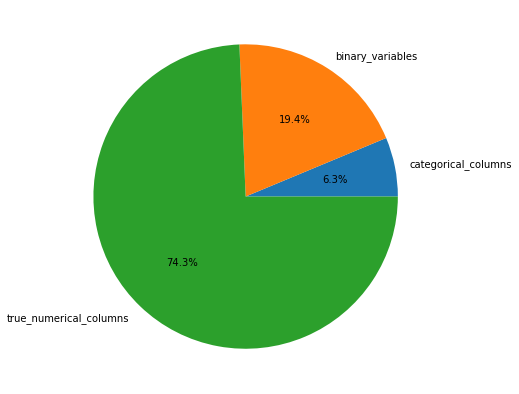

In [52]:
# Plot proportion of columns by data type using a pie chart
variables = {
    'categorical_columns': len(categorical_columns),
    'binary_variables': len(binary_variables),
    'true_numerical_columns': len(numeric_columns)
}

fig = plt.figure(figsize =(10, 7))
plt.pie(list(variables.values()), labels = list(variables.keys()), autopct='%1.1f%%');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Approx 75% columns are numeric.
- 19.5% columns are binary, label encoding can be used for these columns. 
- Only 6.3% columns are categorical with more than 2 categories. Type of encoding can be decided based on number of categories.

### Distribution of target variable

In [53]:
# Get count of target class
print(train_df['TARGET'].value_counts())

print("\n" , "Proportion of loans which were not replayed : ", train_df['TARGET'].value_counts()[1]/train_df['TARGET'].value_counts()[0])

0    282686
1     24825
Name: TARGET, dtype: int64

 Proportion of loans which were not replayed :  0.08781828601345662


Let's check the distribution of target class using a bar plot and check the proportion of transactions amounts being fraud

Text(0.5, 1.0, 'Distribution of Application loans repayed')

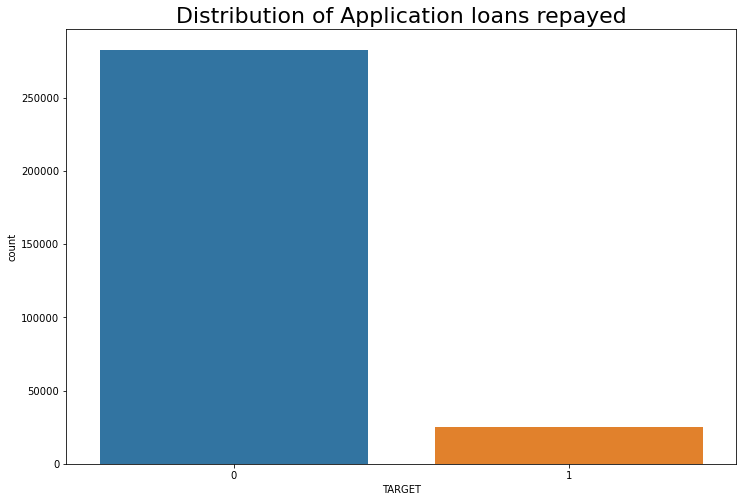

In [54]:
plt.figure(figsize = (12,8))
sns.countplot(x='TARGET', data=train_df)
plt.title('Distribution of Application loans repayed', fontsize = 22)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The target variable is higly **imbalanced**. 
- 8.78% loans were not repayed

### Distribution of Amount Credit (Loan)

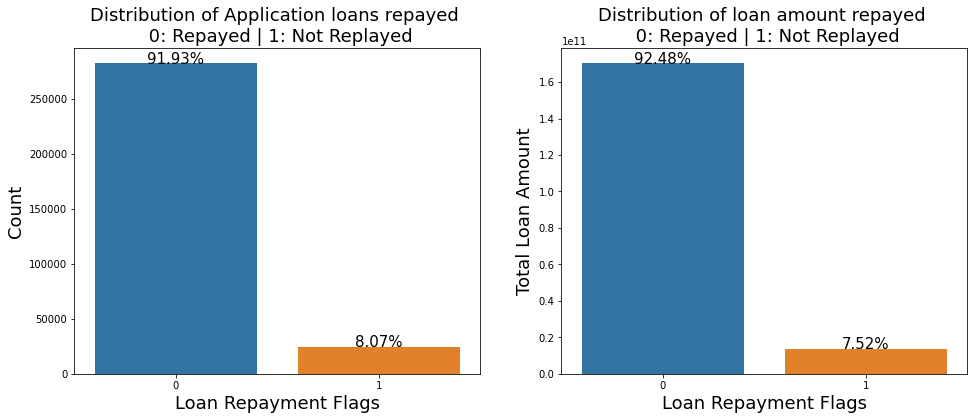

In [55]:
# Distribution of target class and loan amount with respect to target class
train_df['AMT_CREDIT'] = train_df['AMT_CREDIT'].astype(float)
total = len(train_df)
total_amt = train_df.groupby(['TARGET'])['AMT_CREDIT'].sum().sum()
plt.figure(figsize=(16,6))

plt.subplot(121)
g = sns.countplot(x='TARGET', data=train_df )
g.set_title("Distribution of Application loans repayed \n 0: Repayed | 1: Not Replayed", fontsize=18)
g.set_xlabel("Loan Repayment Flags", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

perc_amt = (train_df.groupby(['TARGET'])['AMT_CREDIT'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='TARGET', y='AMT_CREDIT',  dodge=True, data=perc_amt)
g1.set_title("Distribution of loan amount repayed \n 0: Repayed | 1: Not Replayed", fontsize=18)
g1.set_xlabel("Loan Repayment Flags", fontsize=18)
g1.set_ylabel('Total Loan Amount', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 
    
plt.show()

The 8.07% loans which were not repayed, contribute to 7.52% of total loan amount.

Check the distribution of loan amount

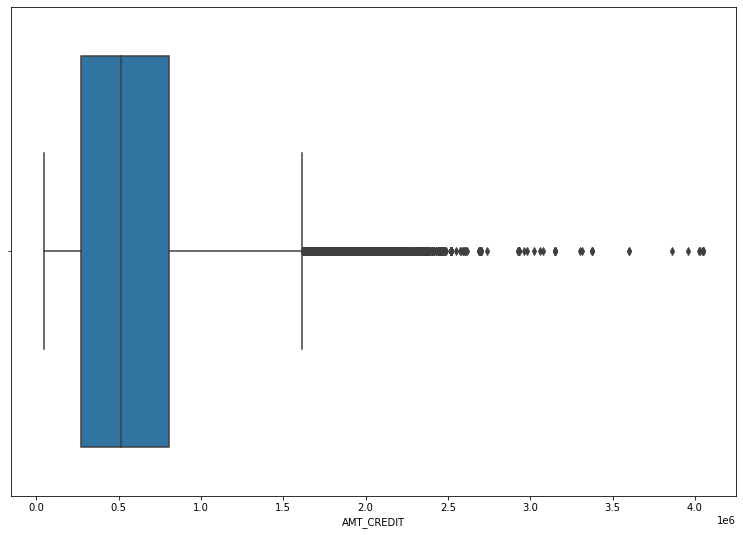

In [56]:
# Plot box plot 
plt.figure(figsize=(13,9))
sns.boxplot("AMT_CREDIT", data = train_df);

It has lot of outliers, i.e. there are few loans which are way far than the normal range of loans, probably big business loans

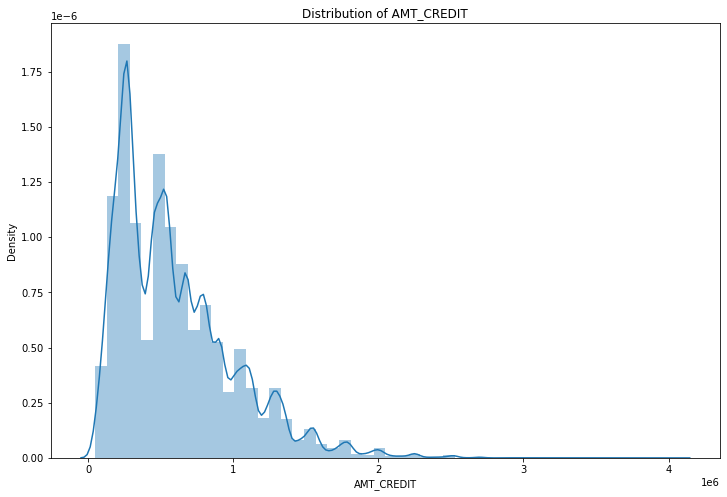

In [57]:
# Distribution of loans
plt.figure(figsize=(12,8))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train_df["AMT_CREDIT"])

The loan amount seems to be rightly skewed.

Let's check the distribution of loans below 90th percentile

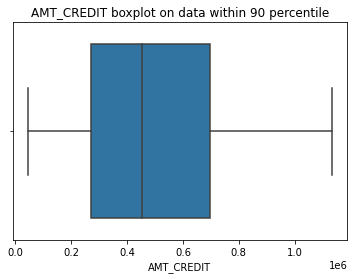

In [58]:
# Box plot of loans below 95th percentile
sns.boxplot(train_df[train_df['AMT_CREDIT'] < np.percentile(train_df['AMT_CREDIT'], 90)]['AMT_CREDIT'], orient='v');
plt.title('AMT_CREDIT boxplot on data within 90 percentile');

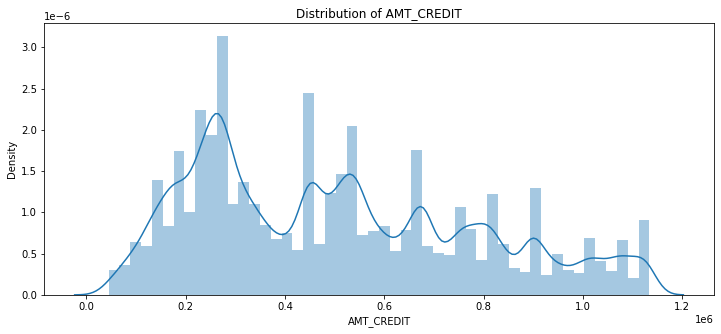

In [59]:
# Distribution of loans below 95th percentile
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train_df[train_df["AMT_CREDIT"] <= np.percentile(train_df['AMT_CREDIT'], 90)]['AMT_CREDIT'])

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The amount credit is rightly skewed. As expected few loans are of high amount
- The 8.07% loans which were not repayed, contribute to 7.52% of total loan amount

### Distribution of AMT_INCOME_TOTAL 
- Income of the client

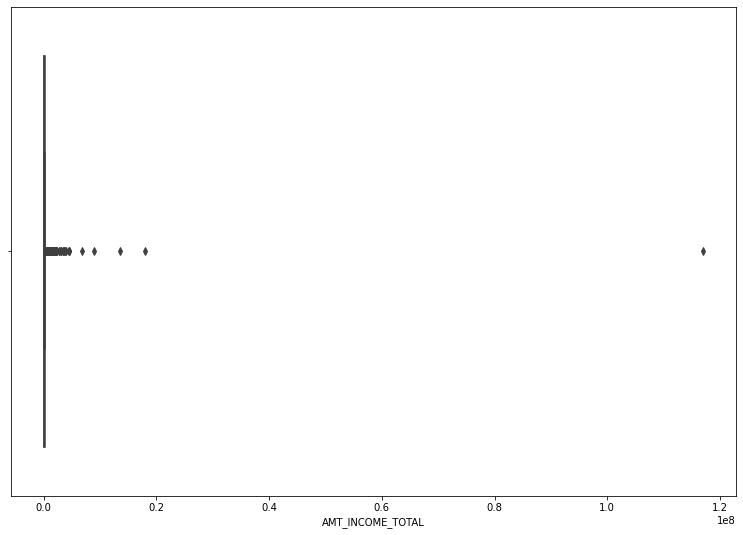

In [60]:
# Plot box plot 
plt.figure(figsize=(13,9))
sns.boxplot("AMT_INCOME_TOTAL", data = train_df);

In [61]:
# Dimensions of data
print("Number of rows with AMT_INCOME_TOTAL > 40000000 is : ",train_df[train_df["AMT_INCOME_TOTAL"] > 40000000].shape[0])

Number of rows with AMT_INCOME_TOTAL > 40000000 is :  1


It's an extreme outlier, let's remove it as boosting algorithms are prone to outliers

In [62]:
# Filter data
train_df = train_df[train_df["AMT_INCOME_TOTAL"] <= 40000000]

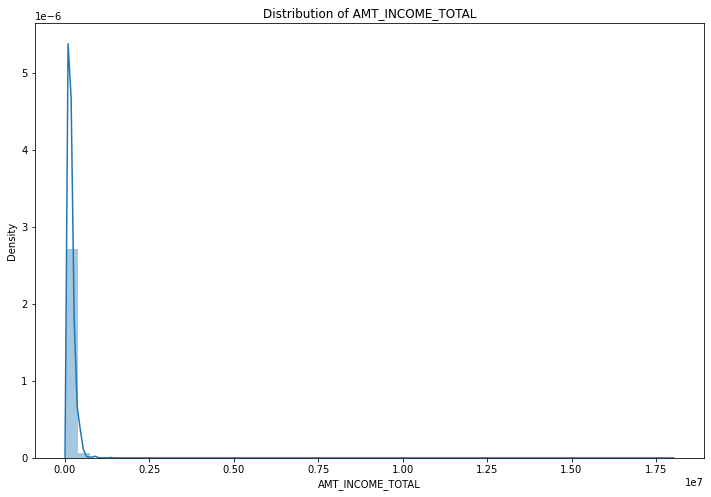

In [63]:
# Distribution of loans
plt.figure(figsize=(12,8))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(train_df["AMT_INCOME_TOTAL"])

The loan amount seems to be rightly skewed.

Let's check the distribution of loans below 90th percentile

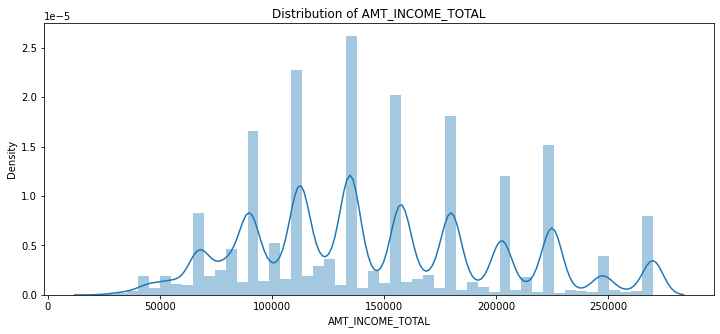

In [64]:
# Distribution of loans below 90th percentile
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(train_df[train_df["AMT_INCOME_TOTAL"] <= np.percentile(train_df['AMT_INCOME_TOTAL'], 90)]["AMT_INCOME_TOTAL"])

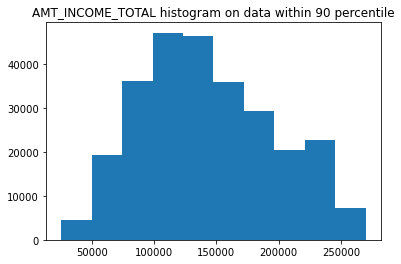

In [65]:
plt.hist(train_df[train_df['AMT_INCOME_TOTAL'] < np.percentile(train_df['AMT_INCOME_TOTAL'], 90)]['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL histogram on data within 90 percentile');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The total income is rightly skewed.
- But if you remove few outliers, it is almost normally distributed, which is good and expected

## Distribution of age

- Client's age in days at the time of application

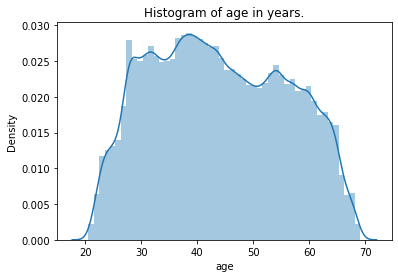

In [66]:
train_df['age'] = train_df['DAYS_BIRTH'] / -365
sns.distplot(train_df['age']);
plt.title('Histogram of age in years.');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The age looks fine as it's normally distributed

## Distribution of DAYS_EMPLOYED

- Days before the application the person started current employment

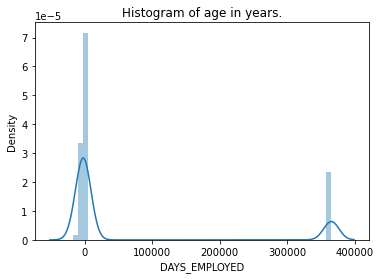

In [67]:
sns.distplot(train_df['DAYS_EMPLOYED']);
plt.title('Histogram of age in years.');

Values in this column are -ve, but there are few positive values, that doesn't make sense. Seems like some wrong entry or empty value. Let's check these values and counts

In [68]:
# Value count of days_employed > 0
train_df[train_df['DAYS_EMPLOYED'] > 0]["DAYS_EMPLOYED"].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

There are 55374 rows which have DAYS_EMPLOYED = 365243. Let's change it to zero as it might affect the model

In [69]:
# Fill outlier with 0
train_df.loc[train_df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

Check the distribution again

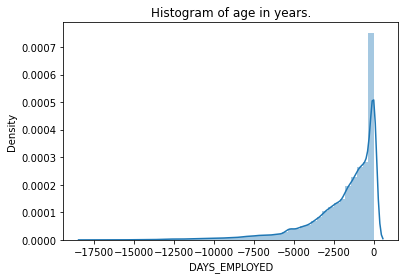

In [70]:
# Distribution of days_employed
sns.distplot(train_df['DAYS_EMPLOYED']);
plt.title('Histogram of age in years.');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 55374 Rows have wrong entry for days_employed. 
- These values has been replaced by 0

## Analyze categorical columns

In [71]:
# def draw_countplot(col):

#     # Create 2x2 sub plots
#     gs = gridspec.GridSpec(2, 2)

#     # plt.figure()
#     fig = plt.figure(figsize=(12,8))
#     ax1 = fig.add_subplot(gs[0, :]) # row 0, col 0
#     sns.countplot(train_df[col], order = train_df[col].value_counts().index, ax=ax1)
#     plt.xticks(rotation=45);
#     plt.title("Distribution of " + col)
#     # plt.tight_layout()
#     ax2 = fig.add_subplot(gs[1, 0]) # row 0, col 1
#     sns.countplot(train_df[train_df["TARGET"] == 0][col], order = train_df[col].value_counts().index, ax=ax2)
#     plt.xticks(rotation=45);
#     plt.title("Distribution of " + col + "\n # TARGET = 0 : Loans Repayed")

#     ax3 = fig.add_subplot(gs[1, 1]) # row 1, span all columns
#     sns.countplot(train_df[train_df["TARGET"] == 1][col], order = train_df[col].value_counts().index, ax=ax3
#                  )
#     plt.xticks(rotation=45);
#     plt.tight_layout()
#     plt.title("Distribution of " + col + "\n # TARGET = 1 : Loans Not Repayed")
    

In [72]:
def plot_cat_feat_dist(df, col):
    tmp = pd.crosstab(df[col], df['TARGET'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Loan Repayed', 1:'Loan Not Repayed'}, inplace=True)

    plt.figure(figsize=(16,12))
    plt.suptitle(f'{col} Distributions', fontsize=20)

    plt.subplot(221)
    g = sns.countplot(x=col, data=df, order=tmp[col].values)
    plt.xticks(rotation=45);

    g.set_title(f"{col} Distribution", fontsize=18)
    g.set_xlabel(f"{col} Name", fontsize=17)
    g.set_ylabel("Count", fontsize=17)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 

    plt.subplot(222)
    g1 = sns.countplot(x=col, hue='TARGET', data=df, order=tmp[col].values)
    plt.xticks(rotation=45);
    plt.legend(title='Loan Repayed', loc='best', labels=['Yes', 'No'])
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Loan Not Repayed', data=tmp, color='black', order=tmp[col].values, legend=False)
    gt.set_ylabel("% of Loans not repayed", fontsize=16)

    g1.set_title(f"{col} by Target( Loan Repayed )", fontsize=18)
    g1.set_xlabel(f"{col} Name", fontsize=17)
    g1.set_ylabel("Count", fontsize=17)
    

    plt.subplots_adjust(hspace = 0.4, top = 0.85)

    plt.show()

### Distribution of NAME_HOUSING_TYPE¶ 
- Housing situation of the client (renting, living with parents, ...)

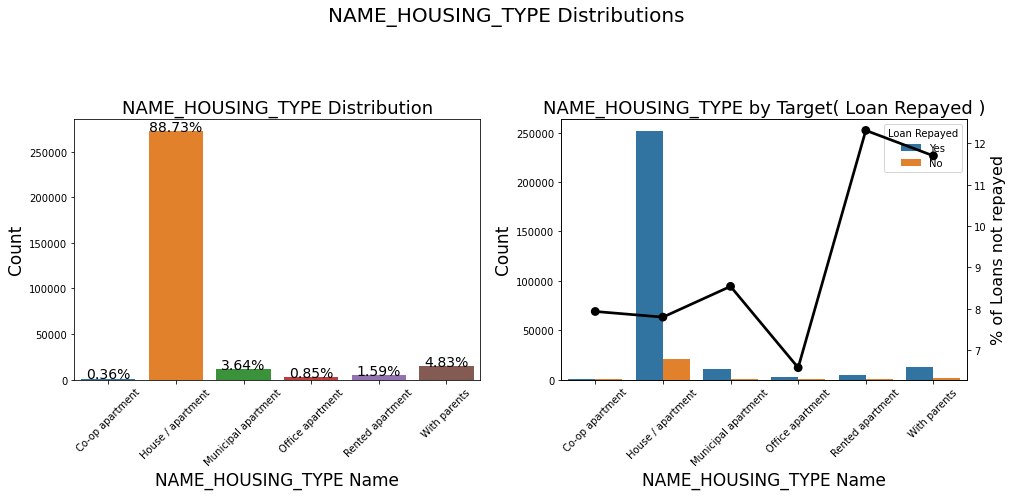

In [73]:
plot_cat_feat_dist(train_df, "NAME_HOUSING_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the loans are taken for House / Apartment
- Clients who have taken loans for rented apartments and with parents have high tendancy of not repaying the loan

### Distribution of CODE_GENDER 
- Gender of the client

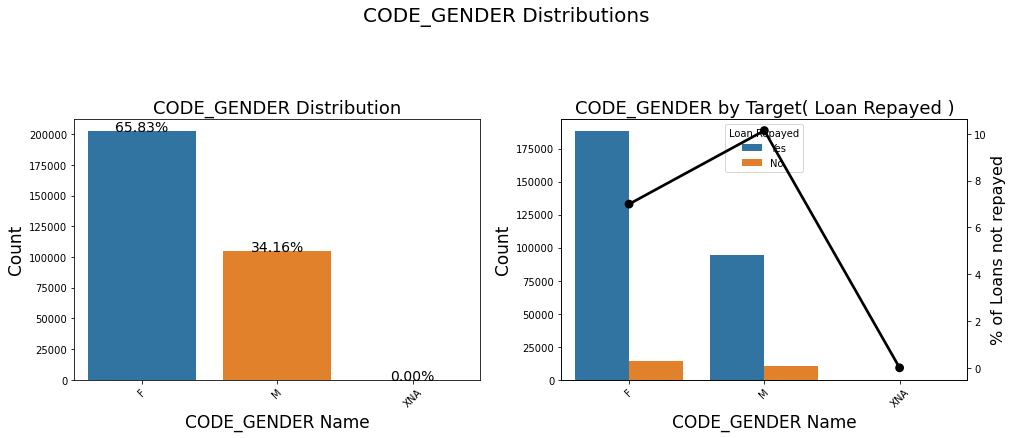

In [74]:
plot_cat_feat_dist(train_df, "CODE_GENDER")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Females have taken more loan, probably because of favourable loan policies for females
- Males have high tendancy of not repaying the loan as compared to females

### Distribution of NAME_FAMILY_STATUS 
- Family status of the client

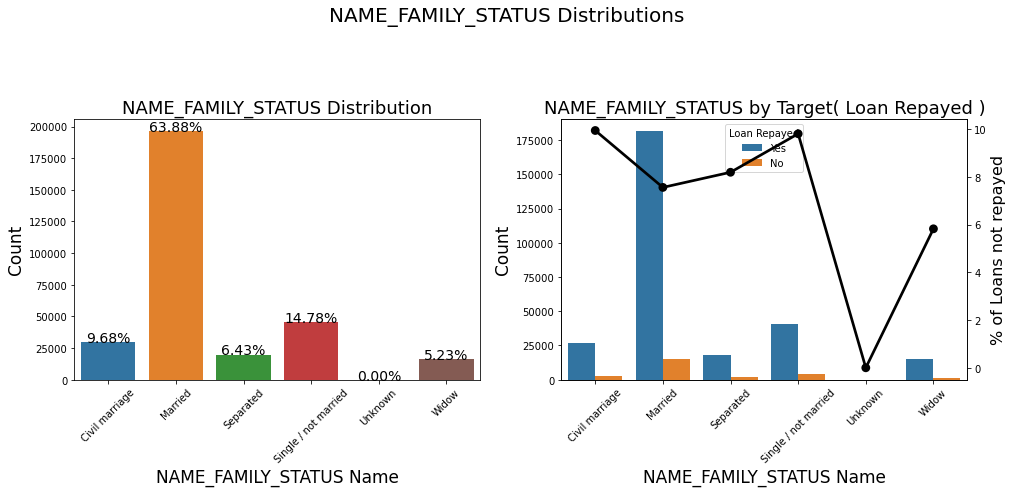

In [75]:
plot_cat_feat_dist(train_df, "NAME_FAMILY_STATUS")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the loans are taken by Married clients
- Clients who are single or have done civil marriage have high tendancy of not repaying the loan as compared to other clients

### Distribution of NAME_TYPE_SUITE 
- Who was accompanying client when he was applying for the loan

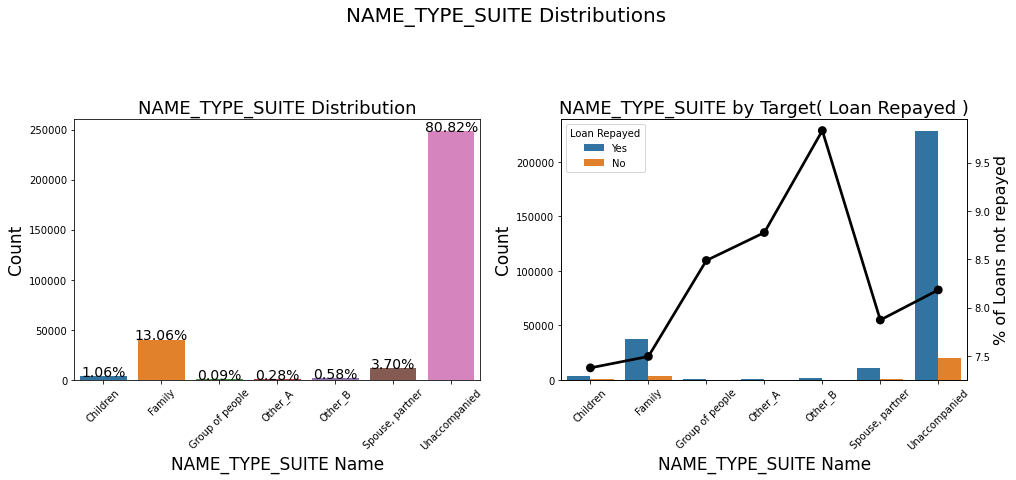

In [76]:
plot_cat_feat_dist(train_df, "NAME_TYPE_SUITE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the clients comes unaccompanied while applying for the loans
- By looking at the charts it can be seen that clients who were accompanied by Other_A or Other_B have high tendancy of not repaying the loan, but since the data points are less, it can't be concluded.

### Distribution of NAME_INCOME_TYPE 
- Clients income type (businessman, working, maternity leave,Ö)

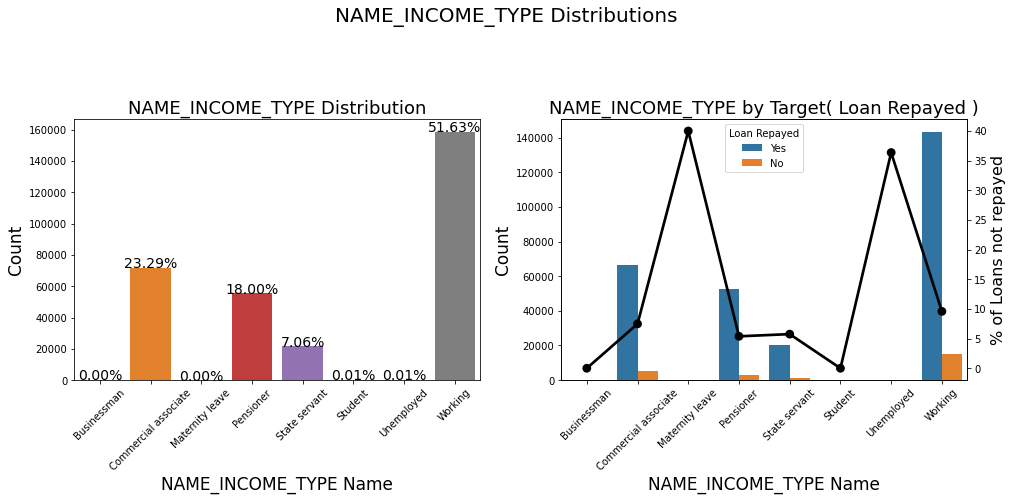

In [77]:
plot_cat_feat_dist(train_df, "NAME_INCOME_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the loans are taken by working clients
- Unemployed clients or the ones who are on maternity leaves have high tendancy of not repaying the loan even though the data points for these clients are very less

### Distribution of NAME_CONTRACT_TYPE 
- Identification if loan is cash or revolving

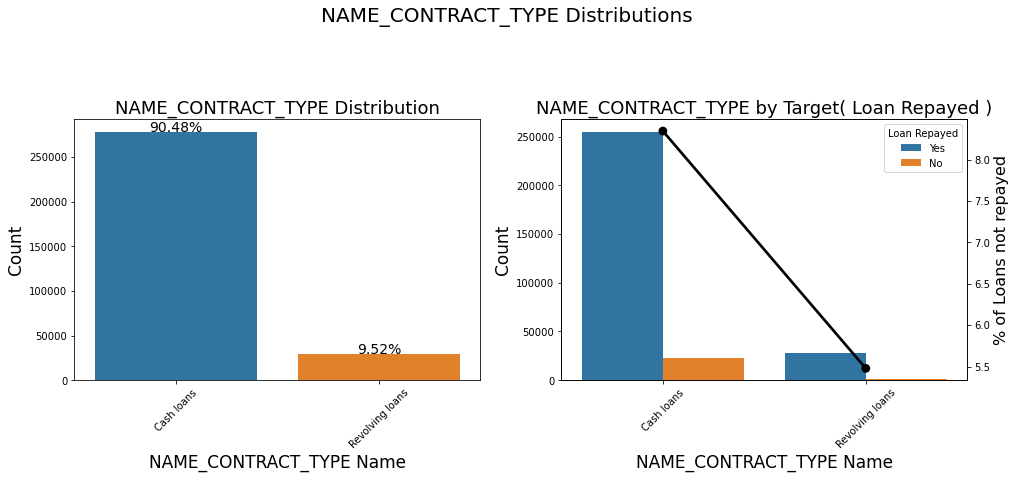

In [78]:
plot_cat_feat_dist(train_df, "NAME_CONTRACT_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the loans are cash loans
- Clients who have taken cash loans have higher tendancy of not repaying the loans as compared to the ones who have taken resolving loans

### Distribution of FLAG_OWN_CAR 
- Flag if the client owns a car

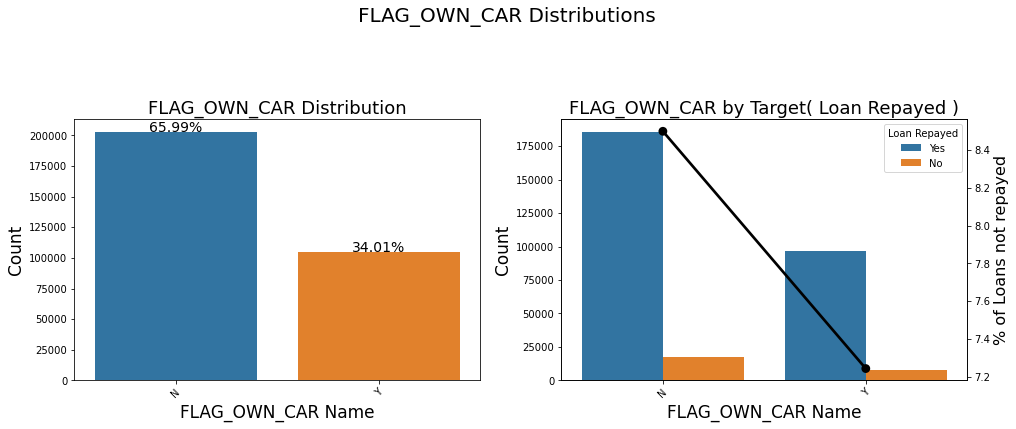

In [79]:
plot_cat_feat_dist(train_df, "FLAG_OWN_CAR")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 66% of the clients who have taken loans don't own a car
- Clients who don't have a car have more tendancy of not repaying the loan, though the differnce is only 1.2%

### Distribution of FLAG_OWN_REALTY 
- Flag if client owns a house or flat

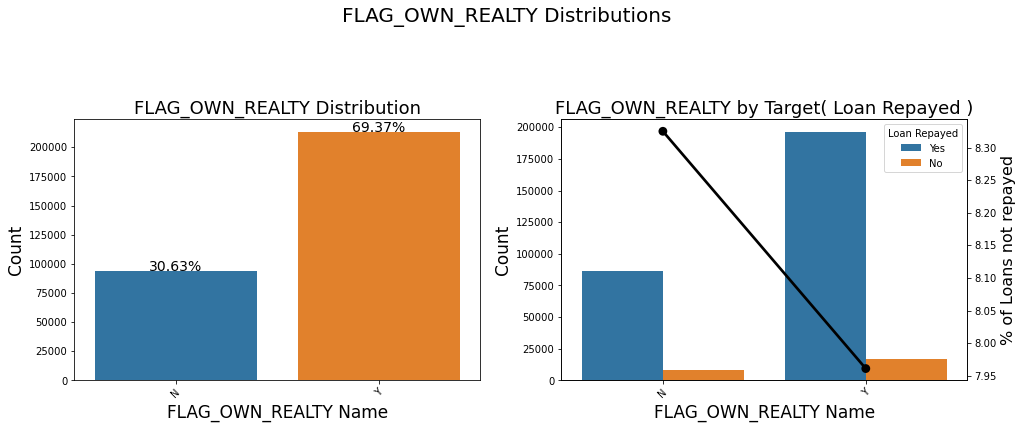

In [80]:
plot_cat_feat_dist(train_df, "FLAG_OWN_REALTY")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 69.3% of the clients who have taken loans own a house or flat which is quite surprising
- Clients who don't own a house have more tendancy of not repaying the loan, though the differnce is only 0.35%

### Distribution of REG_CITY_NOT_LIVE_CITY 
- Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

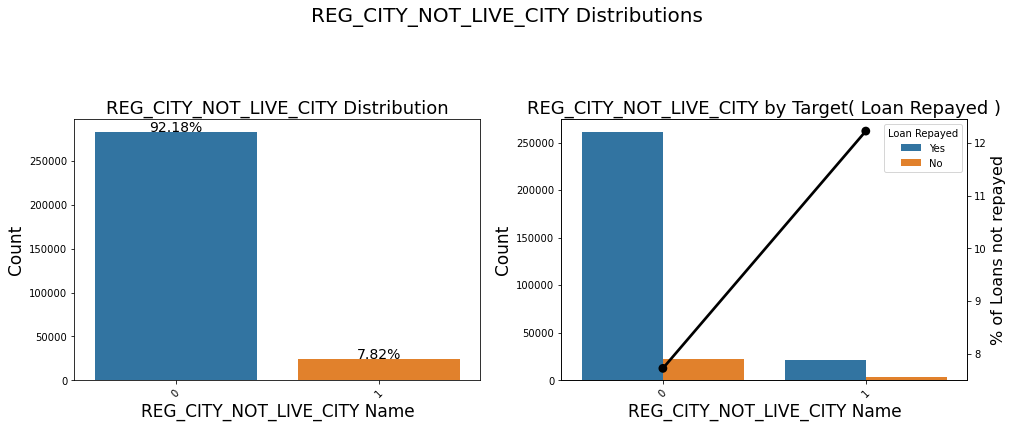

In [81]:
plot_cat_feat_dist(train_df, "REG_CITY_NOT_LIVE_CITY")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the clients who have taken loans have the contact address same as permanent address, which is good
- Clients who have differnce in permanent address and contact address have more tendancy of not repaying the loan, the difference is more than 4%

### Distribution of REG_CITY_NOT_WORK_CITY 
- Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

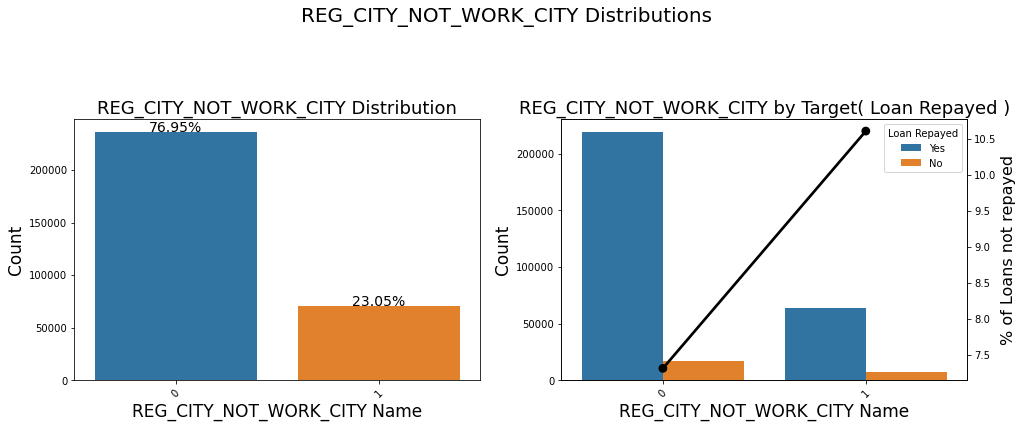

In [82]:
plot_cat_feat_dist(train_df, "REG_CITY_NOT_WORK_CITY")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 77% of the clients who have taken loans have the work city same as permanent address city
- Clients who have differnce in permanent address city and work city have more tendancy of not repaying the loan, the difference is 3%

### Distribution of NAME_EDUCATION_TYPE 
- Level of highest education the client achieved

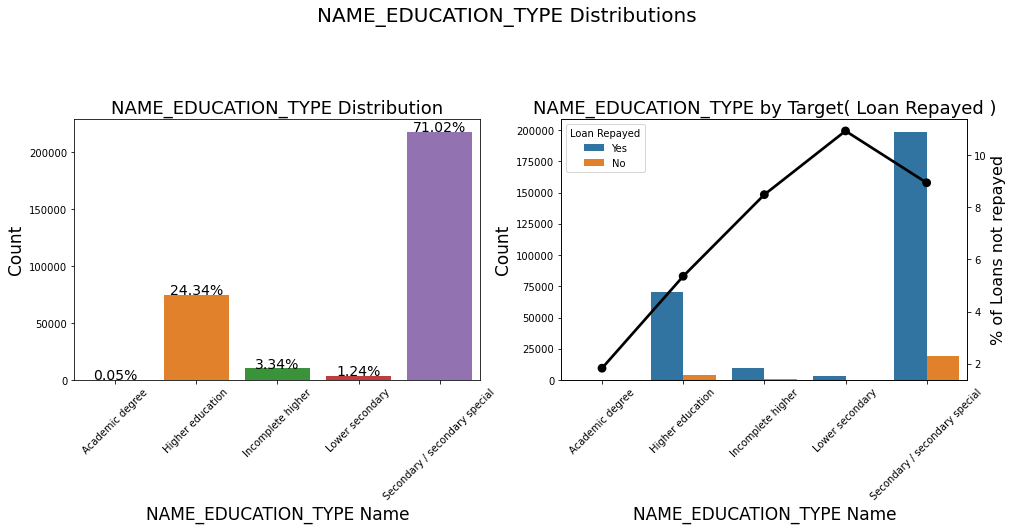

In [83]:
plot_cat_feat_dist(train_df, "NAME_EDUCATION_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the loans are taken by clients who have either secondary or higher education.
- Clients who have academic degree are likely to repay the loans.
- Clients who have only lower secondary are less likely to repay the loans.

### Distribution of CNT_FAM_MEMBERS 
- How many family members does client have

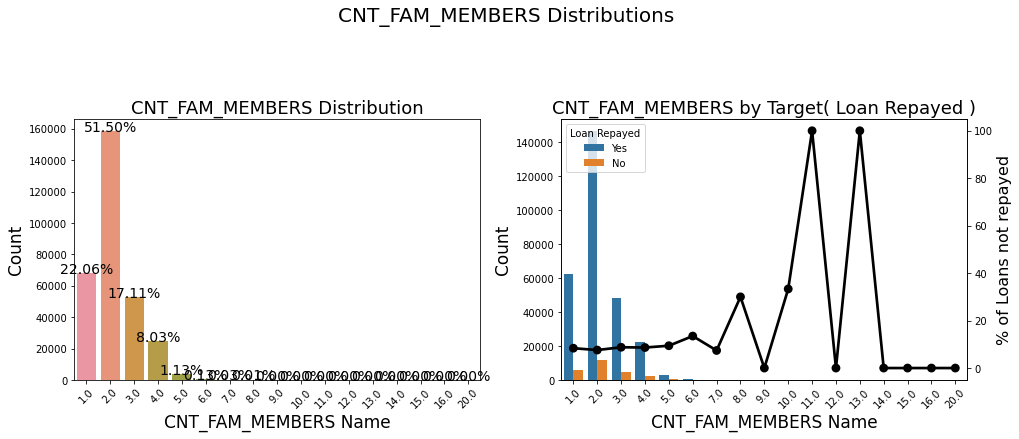

In [84]:
plot_cat_feat_dist(train_df, "CNT_FAM_MEMBERS")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Around 51.5% of the clients have 2 family members, even there are 22% clients who have only 1 family member

### Distribution of contact_info 

train_df['contact_info'] = train_df['FLAG_MOBIL'] + train_df['FLAG_EMP_PHONE'] + train_df['FLAG_WORK_PHONE'] + train_df['FLAG_CONT_MOBILE'] + train_df['FLAG_PHONE'] + train_df['FLAG_EMAIL']


- FLAG_MOBIL	Did client provide mobile phone (1=YES, 0=NO)
- FLAG_EMP_PHONE	Did client provide work phone (1=YES, 0=NO)
- FLAG_WORK_PHONE	Did client provide home phone (1=YES, 0=NO)
- FLAG_CONT_MOBILE	Was mobile phone reachable (1=YES, 0=NO)
- FLAG_PHONE	Did client provide home phone (1=YES, 0=NO)
- FLAG_EMAIL	Did client provide email (1=YES, 0=NO)

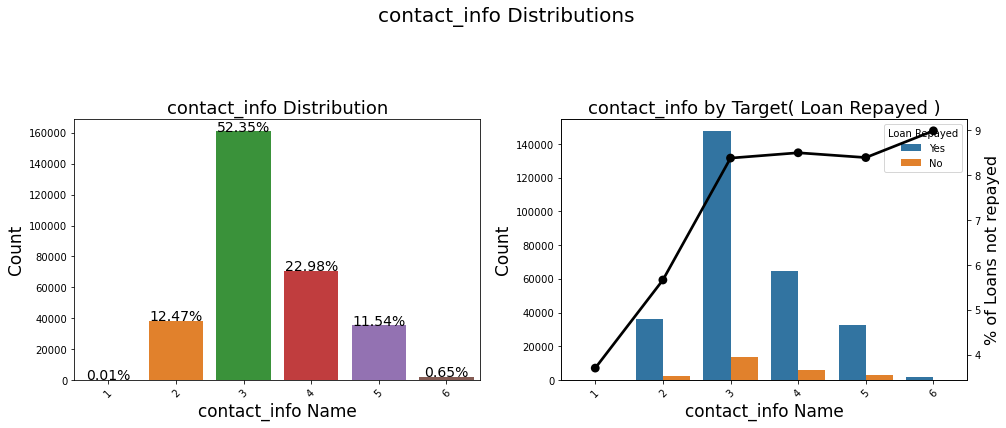

In [85]:
plot_cat_feat_dist(train_df, "contact_info")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- More than 50% clients have provided 3 contact info
- More than 87% clients have provided atleast 4 contact info
- It's very surprising that the clients who have given only 2 contact info have high tendancy of repaying the loans

### Distribution of HOUSETYPE_MODE 
- Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

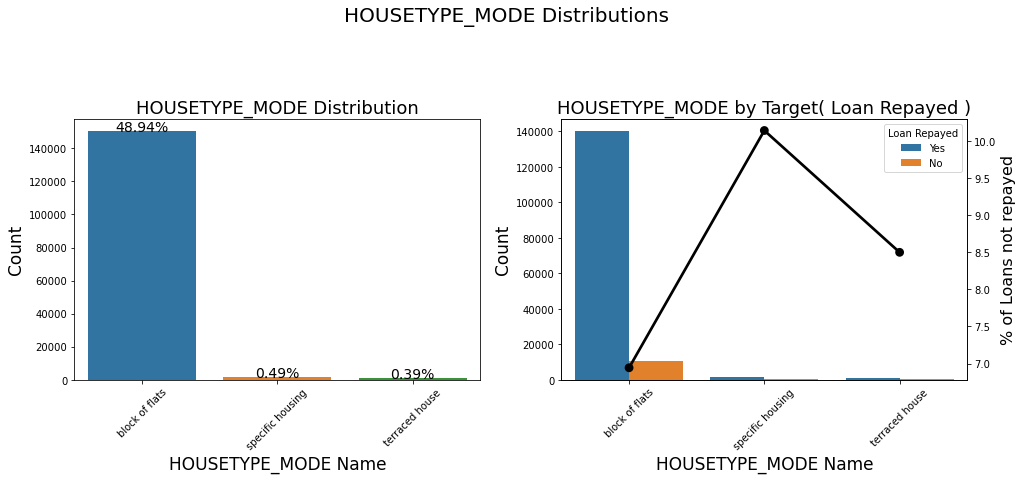

In [86]:
plot_cat_feat_dist(train_df, "HOUSETYPE_MODE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Only less than 50% clients have provided the info about hoursetype_mode

### Distribution of OCCUPATION_TYPE 
- What kind of occupation does the client have

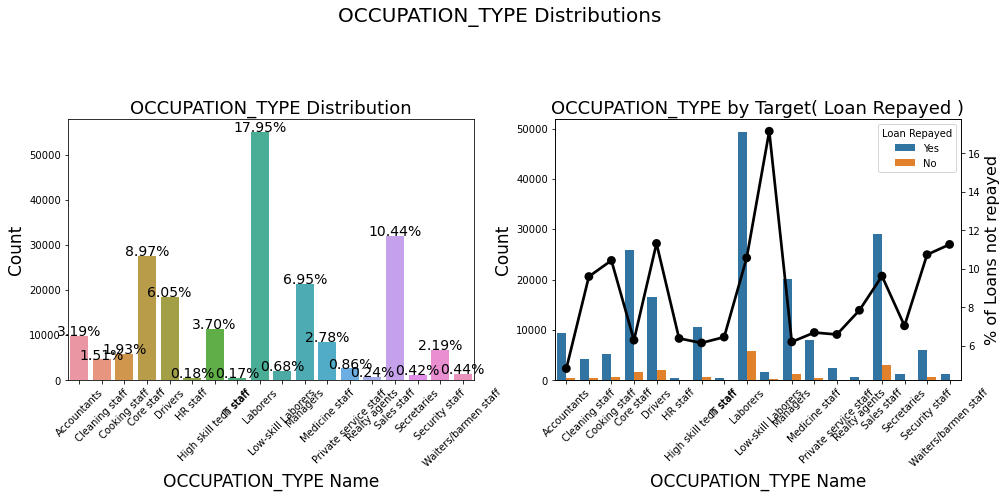

In [87]:
plot_cat_feat_dist(train_df, "OCCUPATION_TYPE")

It's hard to read, let's look at the top 10 occupaction types

In [88]:
train_df["OCCUPATION_TYPE"].value_counts()

Laborers                 55185
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

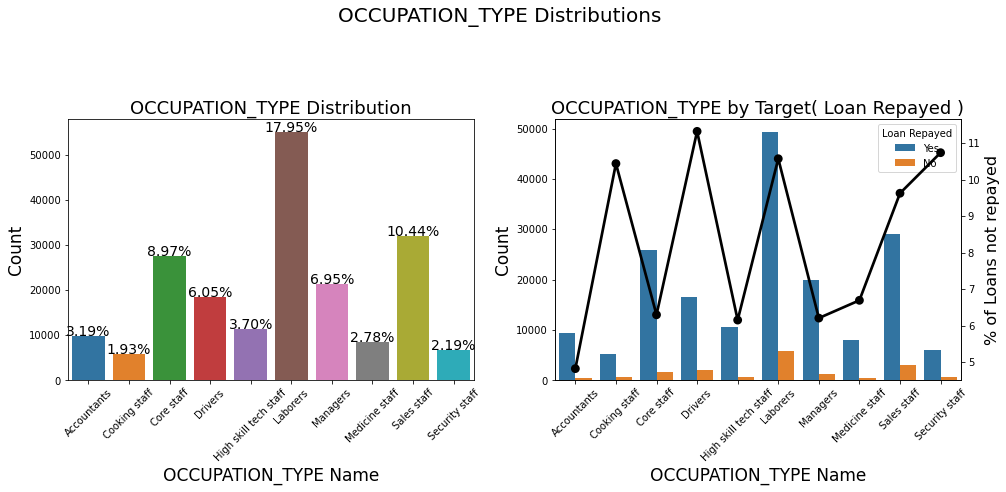

In [89]:
plot_cat_feat_dist(train_df[train_df["OCCUPATION_TYPE"].isin(train_df["OCCUPATION_TYPE"].value_counts().index[:10])], "OCCUPATION_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Laborers have the highest share among loan takers

### Distribution of ORGANIZATION_TYPE 
- Type of organization where client works

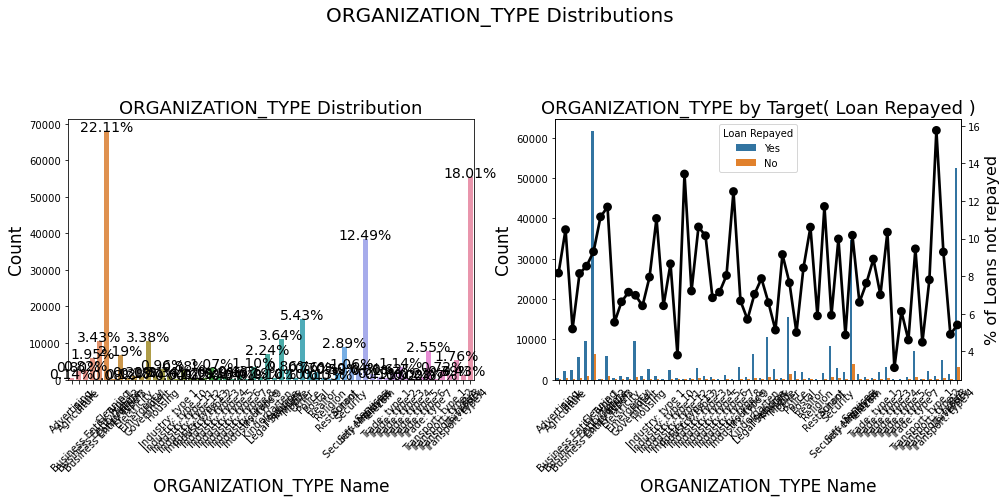

In [90]:
plot_cat_feat_dist(train_df, "ORGANIZATION_TYPE")

It's hard to read, let's look at the top 10 occupaction types

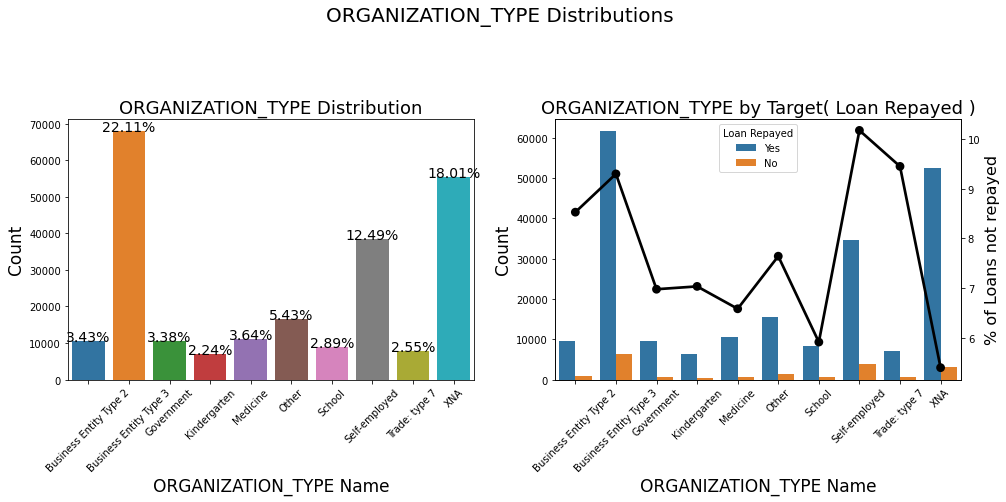

In [91]:
plot_cat_feat_dist(train_df[train_df["ORGANIZATION_TYPE"].isin(train_df["ORGANIZATION_TYPE"].value_counts().index[:10])], "ORGANIZATION_TYPE")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Clients who work in Business Entity Type 2 have the highest share among loan takers
- Clients who are self employed, trade:type 7 and Business Entity Type 2 have high tendancy of not being repayed

We have looked at some of the very important numeric and categorical features, let's look at few more important continours features based on correlation with the target variable

## Continous Variables

### Correlation with target variable

In [92]:
# Correlations with target variable
corr_df = train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr_df.tail(15))
print('\nMost Negative Correlations:\n', corr_df.head(15))

Most Positive Correlations:
 REGION_RATING_CLIENT               0.058901
cc_bal_AMT_DRAWINGS_ATM_CURRENT    0.059925
REGION_RATING_CLIENT_W_CITY        0.060894
cc_bal_MONTHS_BALANCE              0.062081
b_DAYS_CREDIT_UPDATE               0.068920
cc_bal_AMT_INST_MIN_REGULARITY     0.073724
DAYS_BIRTH                         0.078232
cc_bal_CNT_DRAWINGS_CURRENT        0.082520
cc_bal_AMT_RECEIVABLE_PRINCIPAL    0.086062
cc_bal_AMT_RECIVABLE               0.086478
cc_bal_AMT_TOTAL_RECEIVABLE        0.086490
cc_bal_AMT_BALANCE                 0.087177
b_DAYS_CREDIT                      0.089716
cc_bal_CNT_DRAWINGS_ATM_CURRENT    0.107691
TARGET                             1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178897
EXT_SOURCE_2                 -0.160452
EXT_SOURCE_1                 -0.155320
age                          -0.078232
cc_bal_SK_ID_PREV            -0.060481
p_DAYS_FIRST_DRAWING         -0.048808
FLOORSMAX_AVG     

Most correlated features with target variable are EXT_SOURCE_3, EXT_SOURCE_2 & EXT_SOURCE_1. All of these are from an external data souce

### Ext Source 3 
- Normalized score from external data source

<AxesSubplot:xlabel='EXT_SOURCE_3'>

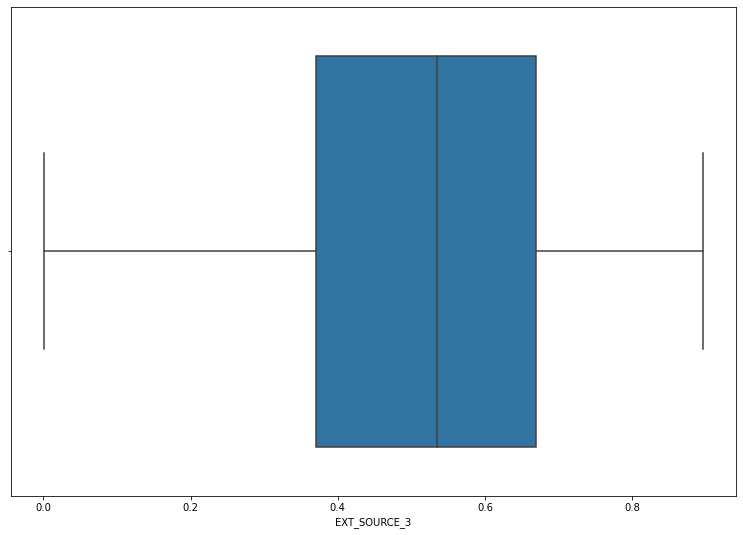

In [93]:
# Plot box plot 
plt.figure(figsize=(13,9))
sns.boxplot("EXT_SOURCE_3", data = train_df)

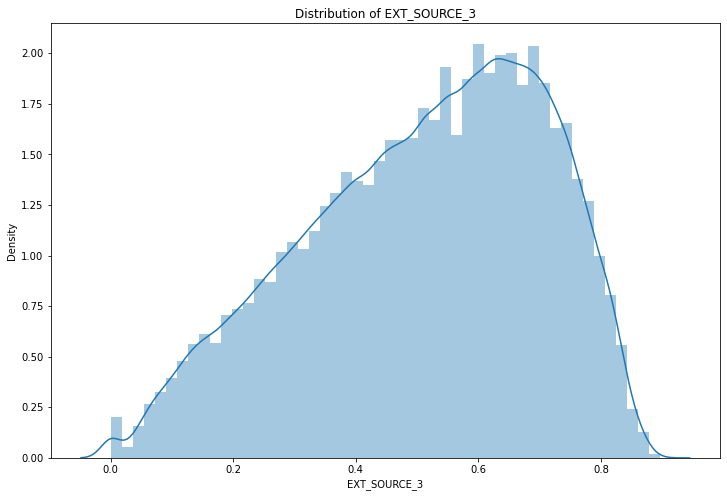

In [94]:
# Distribution of loans
plt.figure(figsize=(12,8))
plt.title("Distribution of EXT_SOURCE_3")
ax = sns.distplot(train_df["EXT_SOURCE_3"])

### EXT_SOURCE_2

<AxesSubplot:xlabel='EXT_SOURCE_2'>

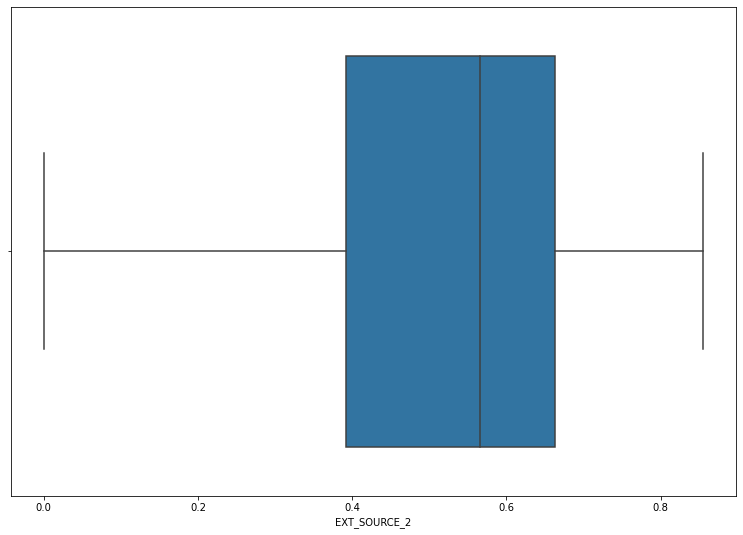

In [95]:
# Plot box plot 
plt.figure(figsize=(13,9))
sns.boxplot("EXT_SOURCE_2", data = train_df)

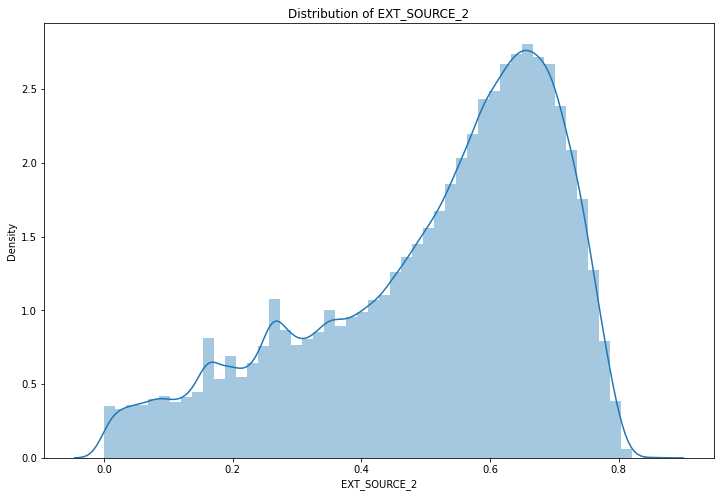

In [96]:
# Distribution of loans
plt.figure(figsize=(12,8))
plt.title("Distribution of EXT_SOURCE_2")
ax = sns.distplot(train_df["EXT_SOURCE_2"])

### EXT_SOURCE_1

<AxesSubplot:xlabel='EXT_SOURCE_1'>

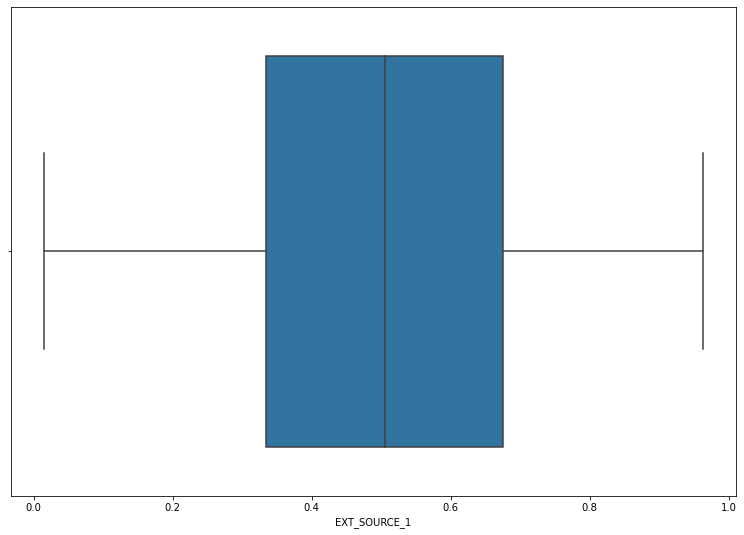

In [97]:
# Plot box plot 
plt.figure(figsize=(13,9))
sns.boxplot("EXT_SOURCE_1", data = train_df)

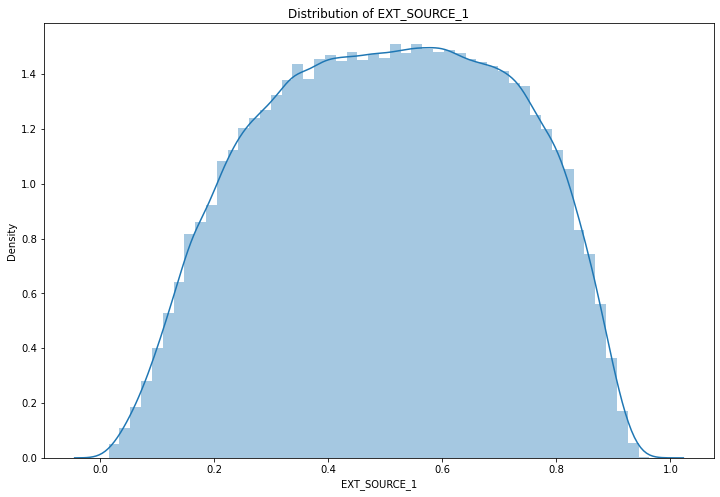

In [98]:
# Distribution of loans
plt.figure(figsize=(12,8))
plt.title("Distribution of EXT_SOURCE_1")
ax = sns.distplot(train_df["EXT_SOURCE_1"])

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- All EXT_SOURCE features doesn't have any outliers 
- EXT_SOURCE_3 is alomost linearly distributed

## Statistical Significance test

### Chi sqare test for categorical columns

In [99]:
# significance value
alpha = 0.05

significant_categorical_variables = []
for col in categorical_columns + binary_variables:
    
    # Create a crosstab table
    temp = pd.crosstab(train_df[col],train_df['TARGET'].astype('category'))
    
    # Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
    stat, p, dof, expected = chi2_contingency(temp)
    
    # Determine whether to reject or keep your null hypothesis
    if p <= alpha:
        significant_categorical_variables.append(col)
    else:
        ""

In [100]:
significant_categorical_variables

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18']

### ANOVA Test

In [101]:
# significance value
alpha = 0.05

significant_numerical_variables = []
for col in numeric_columns:
    # Get F and p value
    F, p = f_oneway(train_df[train_df.TARGET == 1][col].dropna(),
                    train_df[train_df.TARGET == 0][col].dropna())
    
    # Determine whether to reject or keep null hypothesis
    print(col.ljust(50), ',   F-statistic=%.5f, p=%.5f' % (F, p))
    if p <= alpha:
        significant_numerical_variables.append(col)

SK_ID_CURR                                         ,   F-statistic=1.34464, p=0.24622
CNT_CHILDREN                                       ,   F-statistic=113.14940, p=0.00000
AMT_INCOME_TOTAL                                   ,   F-statistic=128.78105, p=0.00000
AMT_CREDIT                                         ,   F-statistic=283.86635, p=0.00000
AMT_ANNUITY                                        ,   F-statistic=50.51531, p=0.00000
AMT_GOODS_PRICE                                    ,   F-statistic=483.60549, p=0.00000
REGION_POPULATION_RELATIVE                         ,   F-statistic=426.67264, p=0.00000
DAYS_BIRTH                                         ,   F-statistic=1893.62515, p=0.00000
DAYS_EMPLOYED                                      ,   F-statistic=653.43613, p=0.00000
DAYS_REGISTRATION                                  ,   F-statistic=542.91734, p=0.00000
DAYS_ID_PUBLISH                                    ,   F-statistic=816.57473, p=0.00000
OWN_CAR_AGE                       

In [102]:
# See Significant variables
print(significant_numerical_variables)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'E

## Missing Value Imputation 

In [103]:
stats_df = get_stats(train_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category     type
132         p_RATE_INTEREST_PRIVILEGED             45                     98.501512                                     98.501512  float16
131            p_RATE_INTEREST_PRIMARY            105                     98.501512                                     98.501512  float16
178         cc_bal_AMT_PAYMENT_CURRENT          56740                     80.143735                                     80.143735  float32
183    cc_bal_CNT_DRAWINGS_ATM_CURRENT           3061                     80.117720                                     80.117720  float16
173    cc_bal_AMT_DRAWINGS_ATM_CURRENT          22420                     80.117720                                     80.117720  float32
186    cc_bal_CNT_DRAWINGS_POS_CURRENT           4408                     80.117720                                     80.117720  float16
185  cc_bal_CNT_DRAWINGS_OTHER_CURRENT            449                     80.117720                                     80.117720  float16
175  cc_bal_AMT_DRAWINGS_OTHER_CURRENT           3924                     80.117720                                     80.117720  float32
176    cc_bal_AMT_DRAWINGS_POS_CURRENT          33407                     80.117720                                     80.117720  float32
154                      b_AMT_ANNUITY          40556                     73.981659                                     73.981659  float32
180    cc_bal_AMT_RECEIVABLE_PRINCIPAL          58514                     71.739130                                     71.739130  float32
174        cc_bal_AMT_DRAWINGS_CURRENT          49069                     71.739130                                     71.739130  float32
170              cc_bal_MONTHS_BALANCE            459                     71.739130                                     71.739130  float64
177     cc_bal_AMT_INST_MIN_REGULARITY          57361                     71.739130                                     71.739130  float32
169                  cc_bal_SK_ID_PREV            128                     71.739130                                     71.739130  float64
179   cc_bal_AMT_PAYMENT_TOTAL_CURRENT          57809                     71.739130                                     71.739130  float32
181               cc_bal_AMT_RECIVABLE          59490                     71.739130                                     71.739130  float32
182        cc_bal_AMT_TOTAL_RECEIVABLE          59487                     71.739130                                     71.739130  float32
171                 cc_bal_AMT_BALANCE          59429                     71.739130                                     71.739130  float32
184        cc_bal_CNT_DRAWINGS_CURRENT           6584                     71.739130                                     71.739130  float64
187   cc_bal_CNT_INSTALMENT_MATURE_CUM           4513                     71.739130                                     71.739130  float16
188                      cc_bal_SK_DPD           3606                     71.739130                                     71.739130  float64
189                  cc_bal_SK_DPD_DEF           1548                     71.739130                                     71.739130  float64
172     cc_bal_AMT_CREDIT_LIMIT_ACTUAL          11313                     71.739130                                     71.739130  float64
62                     COMMONAREA_MODE           2808                     69.872199                                     69.872199  float16
48                      COMMONAREA_AVG           2841                     69.872199                                     69.872199  float16
76                     COMMONAREA_MEDI           2849                     69.872199                                     69.872199  float16
84            NONLIVINGAPARTMENTS_MEDI            214                     69.432864                                     69.432864  float16


In [104]:
temp = train_df.copy()

In [105]:
for col in temp.columns:
    missing_share = temp[col].isnull().sum() * 100 / temp.shape[0]
    if missing_share >= 25:
        temp['missing_flag_' + col] = [1 if pd.isnull(item) else 0 for item in temp[col]]
        temp = temp.drop(col, axis = 1)

In [106]:
temp.shape

(307510, 192)

In [107]:
train_df.shape

(307510, 192)

In [108]:
temp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  contact_info        age  missing_flag_OWN_CAR_AGE  missing_flag_OCCUPATION_TYPE  missing_flag_EXT_SOURCE_1  missing_flag_APARTMENTS_AVG  missing_flag_BASEMENTAREA_AVG  missing_flag_YEARS_BEGINEXPLUATATION_AVG  missing_flag_YEARS_BUILD_AVG  missing_flag_COMMONAREA_AVG  missing_flag_ELEVATORS_AVG  missing_flag_ENTRANCES_AVG  missing_flag_FLOORSMAX_AVG  missing_flag_FLOORSMIN_AVG  missing_flag_LANDAREA_AVG  missing_flag_LIVINGAPARTMENTS_AVG  missing_flag_LIVINGAREA_AVG  missing_flag_NONLIVINGAPARTMENTS_AVG  missing_flag_NONLIVINGAREA_AVG  missing_flag_APARTMENTS_MODE  missing_flag_BASEMENTAREA_MODE  missing_flag_YEARS_BEGINEXPLUATATION_MODE  missing_flag_YEARS_BUILD_MODE  missing_flag_COMMONAREA_MODE  missing_flag_ELEVATORS_MODE  missing_flag_ENTRANCES_MODE  missing_flag_FLOORSMAX_MODE  missing_flag_FLOORSMIN_MODE  missing_flag_LANDAREA_MODE  missing_flag_LIVINGAPARTMENTS_MODE  missing_flag_LIVINGAREA_MODE  missing_flag_NONLIVINGAPARTMENTS_MODE  missing_flag_NONLIVINGAREA_MODE  missing_flag_APARTMENTS_MEDI  missing_flag_BASEMENTAREA_MEDI  missing_flag_YEARS_BEGINEXPLUATATION_MEDI  missing_flag_YEARS_BUILD_MEDI  missing_flag_COMMONAREA_MEDI  missing_flag_ELEVATORS_MEDI  missing_flag_ENTRANCES_MEDI  missing_flag_FLOORSMAX_MEDI  missing_flag_FLOORSMIN_MEDI  missing_flag_LANDAREA_MEDI  missing_flag_LIVINGAPARTMENTS_MEDI  missing_flag_LIVINGAREA_MEDI  missing_flag_NONLIVINGAPARTMENTS_MEDI  missing_flag_NONLIVINGAREA_MEDI  missing_flag_FONDKAPREMONT_MODE  missing_flag_HOUSETYPE_MODE  missing_flag_TOTALAREA_MODE  missing_flag_WALLSMATERIAL_MODE  missing_flag_EMERGENCYSTATE_MODE  missing_flag_p_RATE_INTEREST_PRIMARY  missing_flag_p_RATE_INTEREST_PRIVILEGED  missing_flag_b_DAYS_ENDDATE_FACT  missing_flag_b_AMT_CREDIT_MAX_OVERDUE  mis

In [109]:
train_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age
0      100002       1         Cash loans           M            N               Y             0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Feature Engineering</h2>
</div>

Feature engineering is the process of using domain and statistical knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.


The goal of this section is to:
- Engineer domain specific features
- Encode the categorical features

In [110]:
train_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age
0      100002       1         Cash loans           M            N               Y             0

## Domain Specific Features

You need to engineer the domain specific features. This might boost up the predictive power. This often gives better performing models

Domain knowledge is one of the key pillars of data science. So always understand the domain before attempting the problem.

- **CREDIT_INCOME_PERCENT:** the percentage of the credit amount relative to a client's income
- **ANNUITY_INCOME_PERCENT:** the percentage of the loan annuity relative to a client's income
- **CREDIT_TERM:** the length of the payment in months (since the annuity is the monthly amount due
- **DAYS_EMPLOYED_PERCENT:** the percentage of the days employed relative to the client's age
- **YEARS_EMPLOYED:** the years clint has been employed while applying for the loan

In [111]:
train_df['CREDIT_INCOME_PERCENT'] = train_df['AMT_CREDIT'] / train_df['AMT_INCOME_TOTAL']
train_df['ANNUITY_INCOME_PERCENT'] = train_df['AMT_ANNUITY'] / train_df['AMT_INCOME_TOTAL']
train_df['CREDIT_TERM'] = train_df['AMT_ANNUITY'] / train_df['AMT_CREDIT']
train_df['DAYS_EMPLOYED_PERCENT'] = train_df['DAYS_EMPLOYED'] / train_df['DAYS_BIRTH']
train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365

In [112]:
train_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLO

## Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

In [113]:
categorical_columns = [i for i in train_df.columns if train_df[i].dtype == 'object']

Create a list of variables that needs to be encoded using frequency encoding. Let's note down the features which has more than 30 unique values,  We would using frequency encoding for these features only 

In [114]:
# Frequecny encoding variables
frequency_encoded_variables = []
for col in categorical_columns:
    if train_df[col].nunique() > 30:
        print(col, train_df[col].nunique())
        frequency_encoded_variables.append(col)
        categorical_columns.remove(col)

ORGANIZATION_TYPE 58


In [115]:
# Number of categories in categorical columns
for col in categorical_columns:
    print(col, train_df[col].nunique())

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
FONDKAPREMONT_MODE 4
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7
EMERGENCYSTATE_MODE 2


In [116]:
# Columns for label encoding
label_encoded_varaibles = [col for col in categorical_columns if train_df[col].nunique() == 2]
label_encoded_varaibles

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [117]:
# Columns for one hot encoding
one_hot_encoded_varaibles = [col for col in categorical_columns if train_df[col].nunique() > 2]
one_hot_encoded_varaibles

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

It's time to encode the variable using frequency encoding

### Frequency Encoding
It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on nature of the data.

In [118]:
# Frequecny enocde the variables
for variable in tqdm(frequency_encoded_variables):
    # group by frequency 
    fq = train_df.groupby(variable).size()/len(train_df)    
    # mapping values to dataframe 
    train_df.loc[:, "{}".format(variable)] = train_df[variable].map(fq)   

100%|██████████| 1/1 [00:00<00:00, 13.19it/s]


In [119]:
train_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLOYED
0

### Label encoding
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

It is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.


In [120]:
# Label encode the variables
for col in label_encoded_varaibles:
    lbl = LabelEncoder()
    lbl.fit(list(train_df[col].values))
    train_df[col] = lbl.transform(list(train_df[col].values))

In [121]:
train_df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLOY

### One hot encoding
One hot encoding refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed

In [122]:
# One hot encode the variables
train_df = pd.get_dummies(train_df, columns = one_hot_encoded_varaibles)

In [ ]:
### drop the last column after one hot encoding

In [123]:
train_df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info        age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLOYED  CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spouse, partne

Let's reduce the memory usage as lot of new columns has been added to the data frame

In [124]:
# Reduce memory usage
train_df = reduce_mem_usage(train_df)

Mem. usage decreased to 150.00 Mb (28.7% reduction)


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> 7. Data Preprocessing for model building</h2>
</div>


The goal of this section is to:
- Drop the column which may not be useful
- Split the dataset in training and test sets


**Tip : Save the train df, and clean all memory**

In [2]:
# Save train df to csv file 
# train_df.to_csv("training_df.csv",index = False)

# Read train df
train_df = pd.read_csv("training_df.csv")

Drop the columns which may not be useful for model building

In [3]:
# LightGBMError: Do not support special JSON characters in feature name -

train_df = train_df.drop(['SK_ID_CURR'],axis=1)

In [4]:
import re
train_df = train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

Seperate the x variables and y variables

In [5]:
# Split the y variable series and x variables dataset
X = train_df.drop(['TARGET'],axis=1)
y = train_df.TARGET

# Delete train df
del train_df

# Collect garbage
gc.collect()

21

Split the dataset into train set and test set. Train set will be used to train the model. Test set will be used to check the performance of model

In [6]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
# Head of X_train
X_train.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info    age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLOYED  CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Groupofpeople  NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spousepartner  NAME_TYPE_SUITE_Unaccompa

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> 9. Model Building</h2>
</div>

Finally, model building starts here.

The goal of this section is to:
- Set evaluation metrices
- Build ML models



## Evaluation Metrices
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 

In [7]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))
    print("\n Concordance Index : \n", concordance_index(y_actual, y_predicted_prob))

    print("\n ROC curve : \n")
    plot_roc_curve(model, X_test, y_actual)
    plt.show() 

    print("\n PR curve : \n")
    plot_precision_recall_curve(model, X_test, y_actual)
    plt.show() 


## Start building the models

Let's start with XGBoost first 

## XGBoost

XGBoost is an optimized distributed gradient boosting model designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [9]:
%%time
# Define the model
xgb = XGBClassifier(nthread = -1, random_state=0)

# Train the model
xgb.fit(X_train,y_train)

xgb

[18:53:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 31min 19s, sys: 16.7 s, total: 31min 36s
Wall time: 3min 54s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Let's use the model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

In [10]:
# Prediction
y_pred_xgb = xgb.predict(X_test)
y_prob_pred_xgb = xgb.predict_proba(X_test)
y_prob_pred_xgb = [x[1] for x in y_prob_pred_xgb]
print("Y predicted : ",y_pred_xgb)
print("Y probability predicted : ",y_prob_pred_xgb[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.03993025, 0.029730596, 0.11765385, 0.13190782, 0.41098627]


#### Evaluation Metrices

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 


 Accuracy Score : 
  0.9194822932587559

 AUC Score : 
 0.7698590592511162

 Confusion Matrix : 
  [[84403   462]
 [ 6966   422]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     84865
           1       0.48      0.06      0.10      7388

    accuracy                           0.92     92253
   macro avg       0.70      0.53      0.53     92253
weighted avg       0.89      0.92      0.89     92253


 Concordance Index : 
 0.7698590592511161

 ROC curve : 



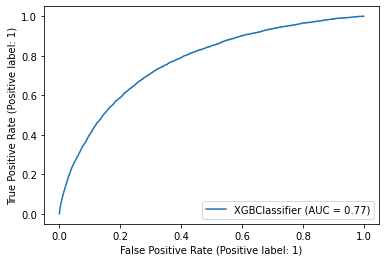


 PR curve : 



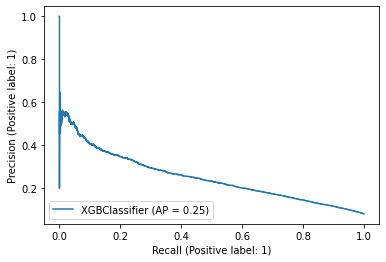

In [11]:
# Compute Evaluation Metric
compute_evaluation_metric(xgb, X_test, y_test, y_pred_xgb, y_prob_pred_xgb)

### XGBoost with booster = gblinear

In [ ]:
# research about booster and send good reference

In [12]:
%%time
# Define the model
xgb = XGBClassifier(nthread = -1 , random_state=0, booster = "gblinear")

# Train the model
xgb.fit(X_train,y_train)

xgb

[18:57:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 2min 8s, sys: 2.86 s, total: 2min 11s
Wall time: 13.9 s


XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=12, nthread=-1, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

Let's use the model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

#### Prediction

In [13]:
# Prediction
y_pred_xgb = xgb.predict(X_test)
y_prob_pred_xgb = xgb.predict_proba(X_test)
y_prob_pred_xgb = [x[1] for x in y_prob_pred_xgb]
print("Y predicted : ",y_pred_xgb)
print("Y probability predicted : ",y_prob_pred_xgb[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.022651074, 0.056029312, 0.053897478, 0.17114228, 0.15431397]


#### Evaluation Metrices

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 


 Accuracy Score : 
  0.9199700822737472

 AUC Score : 
 0.7537337709616256

 Confusion Matrix : 
  [[84769    96]
 [ 7287   101]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84865
           1       0.51      0.01      0.03      7388

    accuracy                           0.92     92253
   macro avg       0.72      0.51      0.49     92253
weighted avg       0.89      0.92      0.88     92253


 Concordance Index : 
 0.7537337709616257

 ROC curve : 



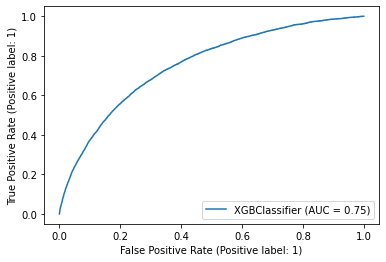


 PR curve : 



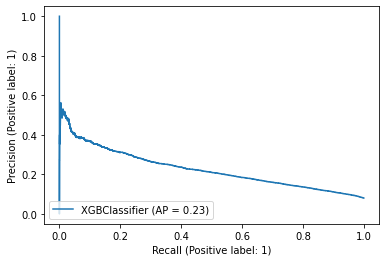

In [14]:
# Compute Evaluation Metric
compute_evaluation_metric(xgb, X_test, y_test, y_pred_xgb, y_prob_pred_xgb)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- XGBoost with "gblinear" booset is giving the better results 
- The accuracy score is 0.92, AUC and concordence scores are 0.76. Ideally AUC should not be less than accuracy
- Recall and f1-score are very less for class 1. That's because of class imbalance
- ROC and PR curve also needs improvements


Let's look at LGBM

## LGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. 

It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

In [15]:
%%time
# Define the model
lgbc = LGBMClassifier(random_state=0, n_jobs = -1)

# Train the model
lgbc.fit(X_train,y_train)

lgbc

CPU times: user 2min 10s, sys: 6.96 s, total: 2min 17s
Wall time: 18.4 s


LGBMClassifier(random_state=0)

Let's use the model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

In [16]:
# Prediction
y_pred_lgbc = lgbc.predict(X_test)
y_prob_pred_lgbc = lgbc.predict_proba(X_test)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.022833878557213718, 0.03245429655380903, 0.08455820339497315, 0.13700141278266015, 0.225327814780797]


#### Evaluation Metrices

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 


 Accuracy Score : 
  0.9202844351945194

 AUC Score : 
 0.7776214131741004

 Confusion Matrix : 
  [[84647   218]
 [ 7136   252]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84865
           1       0.54      0.03      0.06      7388

    accuracy                           0.92     92253
   macro avg       0.73      0.52      0.51     92253
weighted avg       0.89      0.92      0.89     92253


 Concordance Index : 
 0.7776214131741004

 ROC curve : 



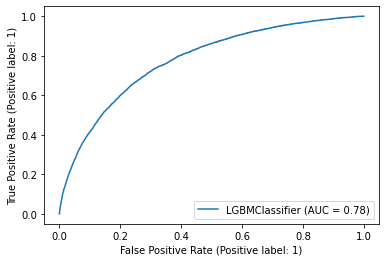


 PR curve : 



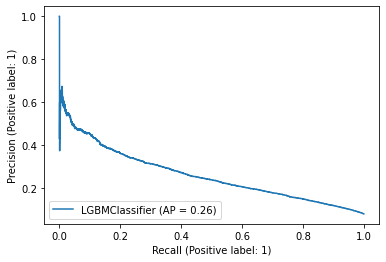

In [17]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test, y_test, y_pred_lgbc, y_prob_pred_lgbc)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With LGBM, Accuracy score is 92%. It's almost similar to XGBoost model
- AUC score has imporved to 0.778 from 0.768
- Recall and f-1 score have also improved, but it's still not upto the mark

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> 8. Improve Model</h2>
</div>

The goal of this section is to:
- Handle Class Imbalance
- Perform hyperparameter tuning to find the most optimal parameters
- Perform cross validation to check if the model is overfitted 
- Compare the performance of various models
- Get the feature importance metric 
- Get final recommendations


## Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

- Upsample

In [8]:
# random over sampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()

0    282686
1    282686
Name: TARGET, dtype: int64

In [9]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [20]:
%%time
# Define the model
lgbc = LGBMClassifier(random_state=0, n_jobs = -1)

# Train the model
lgbc.fit(X_train,y_train)

lgbc

CPU times: user 2min 46s, sys: 5.59 s, total: 2min 51s
Wall time: 20.5 s


LGBMClassifier(random_state=0)

Let's use the model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

In [21]:
# Prediction
y_pred_lgbc = lgbc.predict(X_test)
y_prob_pred_lgbc = lgbc.predict_proba(X_test)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [0 1 0 ... 0 0 0]
Y probability predicted :  [0.35126021270812186, 0.6376434419321477, 0.32531423473671917, 0.7942360486580743, 0.4645367622384858]


#### Evaluation Metrices

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 


 Accuracy Score : 
  0.7358559535881896

 AUC Score : 
 0.8128955997608112

 Confusion Matrix : 
  [[61619 23061]
 [21741 63191]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73     84680
           1       0.73      0.74      0.74     84932

    accuracy                           0.74    169612
   macro avg       0.74      0.74      0.74    169612
weighted avg       0.74      0.74      0.74    169612


 Concordance Index : 
 0.8128955997608112

 ROC curve : 



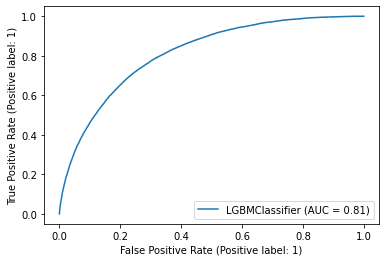


 PR curve : 



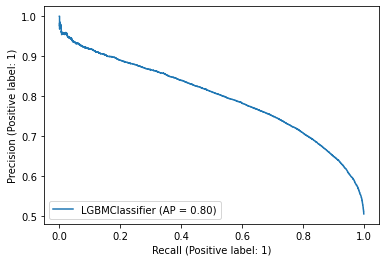

In [22]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test, y_test, y_pred_lgbc, y_prob_pred_lgbc)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- After balancing the class, accuracy score is 0.735 and AUC score is 0.81. 
- Accuracy has decreased as compared to the previos model, but AUC has improved
- Additionally the recall and f-1 score have also improved significantly. It's good 
- ROC and PR curve have also improvements



Let's try to improvise the performance of LGBM using hyperparameter tuning


## Hyperparameter tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

In [10]:
%%time
# Define the estimator
lgbmclassifier = LGBMClassifier(random_state=0)

# Define the parameters gird
param_grid = {
    'n_estimator':[100,200],
    'num_leaves': [32,64],
    'max_depth': [5, 8],
#     'learning_rate': [0.05, 0.1],
    'reg_alpha': [0.1, 0.5]
    }

# run grid search
grid = GridSearchCV(lgbmclassifier, param_grid=param_grid, refit = True, verbose = 3, n_jobs=-1,cv = 3)
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
CPU times: user 3min 41s, sys: 15.8 s, total: 3min 57s
Wall time: 16min 10s


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 8], 'n_estimator': [100, 200],
                         'num_leaves': [32, 64], 'reg_alpha': [0.1, 0.5]},
             verbose=3)

Get the best parameters corresponding to which you have best model

In [11]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

lgbmclassifier = grid.best_estimator_

{'max_depth': 8, 'n_estimator': 100, 'num_leaves': 64, 'reg_alpha': 0.1}
LGBMClassifier(max_depth=8, n_estimator=100, num_leaves=64, random_state=0,
               reg_alpha=0.1)


Let's use the best model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

In [12]:
# Prediction using best parameters
y_grid_pred = lgbmclassifier.predict(X_test)
y_prob_grid_pred = lgbmclassifier.predict_proba(X_test)
y_prob_grid_pred = [x[1] for x in y_prob_grid_pred]
print("Y predicted : ",y_grid_pred)
print("Y probability predicted : ",y_prob_grid_pred[:5])

Y predicted :  [0 1 0 ... 0 1 0]
Y probability predicted :  [0.28092346220770437, 0.6960463618800722, 0.3411248143925754, 0.8107454219423373, 0.4091753431756963]


#### Evaluation Metrices

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- Classification Report
- AUC Score
- Concodense Index
- ROC curve
- PR curve 


 Accuracy Score : 
  0.7615027238638775

 AUC Score : 
 0.8402959966962149

 Confusion Matrix : 
  [[63174 21506]
 [18946 65986]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76     84680
           1       0.75      0.78      0.77     84932

    accuracy                           0.76    169612
   macro avg       0.76      0.76      0.76    169612
weighted avg       0.76      0.76      0.76    169612


 Concordance Index : 
 0.8402959966962149

 ROC curve : 



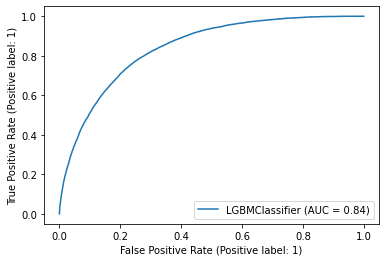


 PR curve : 



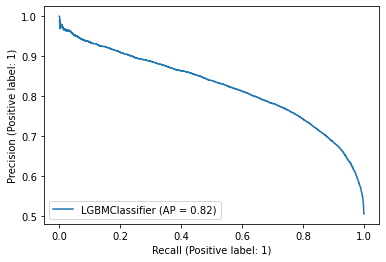

In [13]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbmclassifier, X_test, y_test, y_grid_pred, y_prob_grid_pred)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Accuracy score is 0.75
- AUC score and Concordance index are 0.84, which are the best so far
- Classfication report is also balanced between both the classes
- ROC curve and PR are the best so far

Hence we can freeze the model.

Let's validate the performance of model by looking at the proabilities as well

### Validation using binning probabilities

Divide the data in 10 equal bins as per predicted probabilites and get the proportion of target class 1 in every bin. 

Ideally the proportion should be decreasing as we go down ever bin.
 Let's check it out

In [14]:
# Create Validation set
validation_df = {'y_test' : y_test, 'y_pred' : y_grid_pred, 'y_pred_prob' : y_prob_grid_pred}
validation_df = pd.DataFrame(data = validation_df)
validation_df.head()

y_test  y_pred  y_pred_prob
239567       0       0     0.280923
120515       0       1     0.696046
232489       0       0     0.341125
492196       1       1     0.810745
439336       1       0     0.409175

In [15]:
# Sort dataframe by y_pred_prob column
validation_df = validation_df.sort_values('y_pred_prob', ascending=False)
validation_df.head()

y_test  y_pred  y_pred_prob
338512       1       1     0.976207
499861       1       1     0.976207
412502       1       1     0.976207
449939       1       1     0.976207
556171       1       1     0.976207

In [16]:
# Add binning column to the dataframe
validation_df['bin_y_pred_prob'] = pd.qcut(validation_df['y_pred_prob'], q=10)
validation_df.head()

y_test  y_pred  y_pred_prob bin_y_pred_prob
338512       1       1     0.976207   (0.82, 0.976]
499861       1       1     0.976207   (0.82, 0.976]
412502       1       1     0.976207   (0.82, 0.976]
449939       1       1     0.976207   (0.82, 0.976]
556171       1       1     0.976207   (0.82, 0.976]

In [17]:
# Check the value count for evert bin
validation_df['bin_y_pred_prob'].value_counts()

(0.0086, 0.162]    16964
(0.673, 0.747]     16963
(0.747, 0.82]      16962
(0.25, 0.339]      16961
(0.339, 0.426]     16961
(0.426, 0.514]     16961
(0.514, 0.595]     16961
(0.595, 0.673]     16961
(0.162, 0.25]      16959
(0.82, 0.976]      16959
Name: bin_y_pred_prob, dtype: int64

In [18]:
# Get the mean of actual values for every bin
validation_df_    = validation_df.groupby(["bin_y_pred_prob"]).agg({'y_test': ['mean']})
validation_df_

y_test
                     mean
bin_y_pred_prob          
(0.0086, 0.162]  0.027175
(0.162, 0.25]    0.112094
(0.25, 0.339]    0.220152
(0.339, 0.426]   0.369495
(0.426, 0.514]   0.472673
(0.514, 0.595]   0.605212
(0.595, 0.673]   0.684806
(0.673, 0.747]   0.765077
(0.747, 0.82]    0.836045
(0.82, 0.976]    0.914736

The mean is increasing as we look at the bin with more probaility range. It means it is a good model

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The proportion of target class 1 is increasing as wel look at the bin with high probability range. That means it's a good model

## Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [19]:
# Feature importance score for best estimator
lgbmclassifier = grid.best_estimator_

lgbmclassifier.feature_importances_ 

array([ 24,   1,   2,   3,  43,  80, 132,  83,  65, 108,  60,  69,  96,
        85,   0,   0,   9,   0,   4,   0,   9,   6,  24,  24,   0,   3,
         2,  13,   2,   1,  32, 275, 218, 237,  14,  16,  24,   8,  19,
         7,  13,  10,   5,  19,   7,  17,  13,  12,  24,  13,  20,  13,
        16,   5,   7,   6,   6,  19,  12,  20,   4,  13,   7,   8,  14,
         7,  13,   3,   5,   2,   2,  11,   9,   7,   2,  12,  30,   0,
        12,  16,  11,  14,  65,   0,  29,   0,   0,   0,   0,   1,   0,
         0,   3,   0,   3,   0,   0,   4,   0,   7,   0,   0,   0,   0,
         0,   3,   9,  16,  12,  44,  65,  27,  28,  79,  38,  77,   1,
        50,   2,   2,  51, 111, 117,  12,  38,  47,  29,  27,  31,  53,
        94,   3,  87,  60,  94,   9, 113, 101,  54,  14,  51,  41,  45,
        57,  74,  58,  35,  34,  33, 125, 107,  61,  38, 125,  60,  66,
        21,  19,  15,  33,  21,  21,   5,  16,   5,  26,   8,  18,  11,
         6,  63,  67,   3,   6,  15,  16,   9,   3,  74,  77,  9

In [20]:
feature_importance_df = pd.DataFrame({'feature' : X_train.columns, 'importance' : lgbmclassifier.feature_importances_ })

In [21]:
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

feature  importance
181                  CREDIT_TERM         287
31                  EXT_SOURCE_1         275
33                  EXT_SOURCE_3         237
32                  EXT_SOURCE_2         218
6                    AMT_ANNUITY         132
153    pos_CNT_INSTALMENT_FUTURE         125
149                i_AMT_PAYMENT         125
122                p_CNT_PAYMENT         117
136             b_AMT_CREDIT_SUM         113
121           p_SELLERPLACE_AREA         111
9                     DAYS_BIRTH         108
150               pos_SK_ID_PREV         107
137        b_AMT_CREDIT_SUM_DEBT         101
12               DAYS_ID_PUBLISH          96
130                b_DAYS_CREDIT          94
134     b_AMT_CREDIT_MAX_OVERDUE          94
180       ANNUITY_INCOME_PERCENT          94
132        b_DAYS_CREDIT_ENDDATE          87
13                   OWN_CAR_AGE          85
7                AMT_GOODS_PRICE          83
5                     AMT_CREDIT          80
113           p_AMT_DOWN_PAYMENT          79
115    p_HOUR_APPR_PROCESS_START          77
182        DAYS_EMPLOYED_PERCENT          77
179        CREDIT_INCOME_PERCENT          77
178                          age          74
144     i_NUM_INSTALMENT_VERSION          74
11             DAYS_REGISTRATION          69
171  cc_bal_CNT_DRAWINGS_CURRENT          67
155               pos_SK_DPD_DEF          66

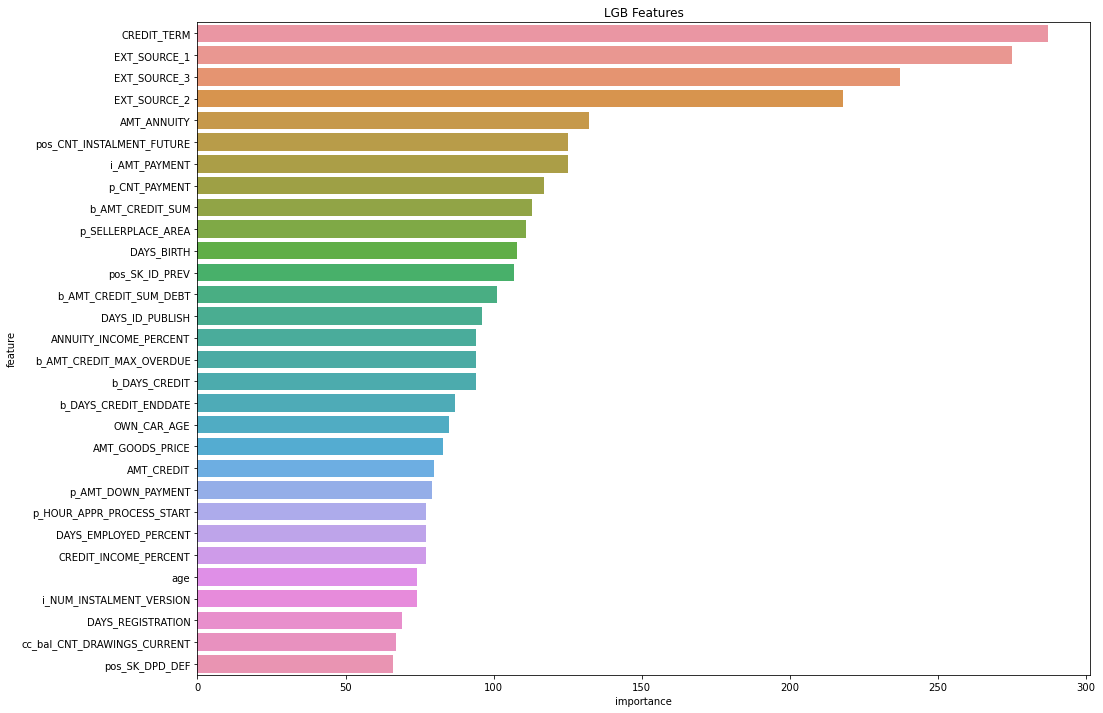

In [22]:
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('LGB Features');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- CREDIT_TERM is contributing the most in predicting if a transaction is fraud or not
- EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3 etc are some of the most important features in predicting the fraud

### Manually check the devices which are incorrectly classified

In [23]:
# Prediction using best parameters
X_test['prediction'] = lgbmclassifier.predict(X_test)
X_test['actual']     = y_test

In [24]:
# Correct Prediction Flag
X_test = X_test.assign(correct_prediction_flag = lambda x: (x['prediction'] == x['actual']))

In [25]:
X_test[X_test['correct_prediction_flag'] == False]

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  p_SK_ID_PREV  p_AMT_ANNUITY  p_AMT_APPLICATION  p_AMT_CREDIT  p_AMT_DOWN_PAYMENT  p_AMT_GOODS_PRICE  p_HOUR_APPR_PROCESS_START  p_NFLAG_LAST_APPL_IN_DAY  p_RATE_DOWN_PAYMENT  p_RATE_INTEREST_PRIMARY  p_RATE_INTEREST_PRIVILEGED  p_DAYS_DECISION  p_SELLERPLACE_AREA  p_CNT_PAYMENT  p_DAYS_FIRST_DRAWING  p_DAYS_FIRST_DUE  p_DAYS_LAST_DUE_1ST_VERSION  p_DAYS_LAST_DUE  p_DAYS_TERMINATION  p_NFLAG_INSURED_ON_APPROVAL  b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  b_DAYS_CREDIT_UPDATE  b_AMT_ANNUITY  b_buro_count  i_SK_ID_PREV  i_NUM_INSTALMENT_VERSION  i_NUM_INSTALMENT_NUMBER  i_DAYS_INSTALMENT  i_DAYS_ENTRY_PAYMENT  i_AMT_INSTALMENT  i_AMT_PAYMENT  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  cc_bal_SK_ID_PREV  cc_bal_MONTHS_BALANCE  cc_bal_AMT_BALANCE  cc_bal_AMT_CREDIT_LIMIT_ACTUAL  cc_bal_AMT_DRAWINGS_ATM_CURRENT  cc_bal_AMT_DRAWINGS_CURRENT  cc_bal_AMT_DRAWINGS_OTHER_CURRENT  cc_bal_AMT_DRAWINGS_POS_CURRENT  cc_bal_AMT_INST_MIN_REGULARITY  cc_bal_AMT_PAYMENT_CURRENT  cc_bal_AMT_PAYMENT_TOTAL_CURRENT  cc_bal_AMT_RECEIVABLE_PRINCIPAL  cc_bal_AMT_RECIVABLE  cc_bal_AMT_TOTAL_RECEIVABLE  cc_bal_CNT_DRAWINGS_ATM_CURRENT  cc_bal_CNT_DRAWINGS_CURRENT  cc_bal_CNT_DRAWINGS_OTHER_CURRENT  cc_bal_CNT_DRAWINGS_POS_CURRENT  cc_bal_CNT_INSTALMENT_MATURE_CUM  cc_bal_SK_DPD  cc_bal_SK_DPD_DEF  contact_info    age  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  YEARS_EMPLOYED  CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Groupofpeople  NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spousepartner  NAME_TYPE_SUITE_Unaccompa

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- We can't identify the differnce between target class 1 and 0 manually as well, Hence more variables needs to be identified in order to increase the accuracy further 

## Final Recommendation

The model has been trained and tested, so now you can use it to predict if any home loan would be relayed or not. 

Let’s look at steps involved to use the model to get predictions for new loan
- Store the exact same information of a new loan as you have for the raw data
- Transform the details of the new loan to make it exactly like the training dataset
- Use the final model to predict the chances of a loan being unpaid
- Monitor it closely and decline the unpaid loans

One very important thing to note is that you need to keep a check on the performance of the model, if it deteriorates, re-train the model with new training data and use it for predictions
